In [66]:
#Packages and module imported
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [67]:
# Uploading the xlsx files with the metadata for statistics and for machine learning + the metabolites concentrations
from google.colab import drive
drive.mount('/content/drive')

met_stat = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Deliverables/metadata_statistics_D1_1.xlsx')
met_ml = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Deliverables/metadata_one_hot_D1_1.xlsx')
conc = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Deliverables/lodq2_D1.2.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# Urinary dilution correction with urinary density
u_density =  pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/urinary_density.xlsx')
conc['Density'] = u_density['Density']

mean_density = np.mean(conc['Density'])

for index, row in conc.iterrows():
    for column in conc.columns:
        if column not in ['Density', 'Groups_encoded', 'ID']:
            current_value = float(row[column])
            current_density = float(row['Density'])
            corrected_value = current_value * (mean_density - 1) / (current_density - 1)
            conc.loc[index, column] = corrected_value
conc.drop(columns=['Density'], inplace=True)

conc.head()

8-oxo-dGUO  8-OH-guanosine    Adenosine  Anthranilic   Cotinine  \
0    0.125349        1.689686   685.485437  1119.260116   0.501395   
1    8.622162        7.911455  1291.897351   740.581593   1.192381   
2   27.987888        9.279474  5414.514108  6622.198999  17.270309   
3    4.001971        0.956540   472.518326   666.848707   0.250698   
4    4.533993        0.282035   414.840908   819.238124   0.779318   

      Dopamine  Epinephrine         GABA    Glutamate     Glutamine  ...  \
0   272.402565    25.133138  1699.406192  3309.429208  37068.631624  ...   
1   713.405025   177.157244  2432.548474  3299.490673  49665.037557  ...   
2  1306.330752   343.333082  4304.631482  5243.516373  66235.049596  ...   
3   317.666055    11.458617   807.015315  1610.543601  21925.120773  ...   
4   387.583842    14.273259   926.632427  2459.786223  28343.636645  ...   

    Kynurenine   Melatonin       NNAL  Norepinephrine  OH-cotinine  \
0  2135.186279  108.281088   3.736023      233.004628     0.334264   
1  1489.002722  125.703819   1.858021       94.906481     1.826705   
2   232.082406   55.024125  29.470489      632.697557    44.973848   
3   990.385273   51.424595   0.125349       26.368262     0.167132   
4  3658.068519   88.311164   0.187975       38.800045     0.015669   

   Quinolinic acid   Serotonin     Tryptophan  Xanthurenic acid  \
0       328.031654  158.114445   78564.561723       2978.110699   
1      1261.690175  129.589794   47439.586271       3626.572835   
2      1959.389227  870.975947  118763.348868       4249.618554   
3       382.053153   72.883710   16330.845739       2370.092921   
4       508.944550   70.891291   35338.372802       3045.795681   

   Groups_encoded  
0               0  
1               3  
2               1  
3               0  
4               0  

[5 rows x 22 columns]

In [69]:
conc['ID'] = met_stat['ID']
conc['Exposure_Group'] = met_stat['Exposure_Group']
conc['QA/KA'] = conc['Quinolinic acid'] / conc['Kynurenic acid']
columns_to_move = ['ID', 'Exposure_Group', 'Groups_encoded']
new_column_order = columns_to_move + [col for col in conc.columns if col not in columns_to_move]
conc = conc[new_column_order]
print(conc.head)

conc.to_excel('/content/drive/My Drive/Alberto Constantino Puscasu/SG_standarized_metabolites.xlsx', index=False)

<bound method NDFrame.head of         ID  Exposure_Group  Groups_encoded  8-oxo-dGUO  8-OH-guanosine  \
0    EC002               0               0    0.125349        1.689686   
1    EC003               3               3    8.622162        7.911455   
2    EC004               1               1   27.987888        9.279474   
3    EC005               0               0    4.001971        0.956540   
4    EC006               0               0    4.533993        0.282035   
..     ...             ...             ...         ...             ...   
210  EC280               0               0    6.302038        0.094012   
211  EC281               0               0    2.877207        0.501395   
212  EC282               2               2    5.520724        2.821732   
213  EC284               1               1    8.662440        1.945459   
214  EC285               1               1    7.393391        4.488470   

       Adenosine  Anthranilic   Cotinine     Dopamine  Epinephrine  ...  \
0     

In [70]:
# Merging the metadata and metabolites datasets for the statistical part
if met_stat['Exposure_Group'].equals(conc['Groups_encoded']):
  print("Values in 'Exposure_Group' and 'Groups_encoded' are the same.")
  statistics_df = pd.merge(conc, met_stat, on='ID', suffixes=('', '_duplicate'))
  statistics_df.drop(columns=['Groups_encoded'], inplace=True)
else:
  print("Values in 'Exposure_Group' and 'Groups_encoded' are not the same.")

statistics_df = statistics_df.rename(columns={'Civil_status': 'Parents_liv_tog'})
print(statistics_df.head)
#statistics_df.to_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Deliverables/statistics_df_D1_2.xlsx', index=False)

Values in 'Exposure_Group' and 'Groups_encoded' are the same.
<bound method NDFrame.head of         ID  Exposure_Group  8-oxo-dGUO  8-OH-guanosine    Adenosine  \
0    EC002               0    0.125349        1.689686   685.485437   
1    EC003               3    8.622162        7.911455  1291.897351   
2    EC004               1   27.987888        9.279474  5414.514108   
3    EC005               0    4.001971        0.956540   472.518326   
4    EC006               0    4.533993        0.282035   414.840908   
..     ...             ...         ...             ...          ...   
210  EC280               0    6.302038        0.094012   541.469822   
211  EC281               0    2.877207        0.501395   369.778919   
212  EC282               2    5.520724        2.821732  1011.866120   
213  EC284               1    8.662440        1.945459   753.768735   
214  EC285               1    7.393391        4.488470  1075.455287   

     Anthranilic   Cotinine     Dopamine  Epinephrine  

In [71]:
# Merging the metadata and metabolites datasets for the machine learning
# Since met_ml comes from met_stat the metabolites dataset and met_ml are already aligned
ml_df = pd.merge(conc, met_ml, left_index=True, right_index=True, how='inner')
#ml_df.to_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Deliverables/ml_df_D1_2.xlsx', index=False)


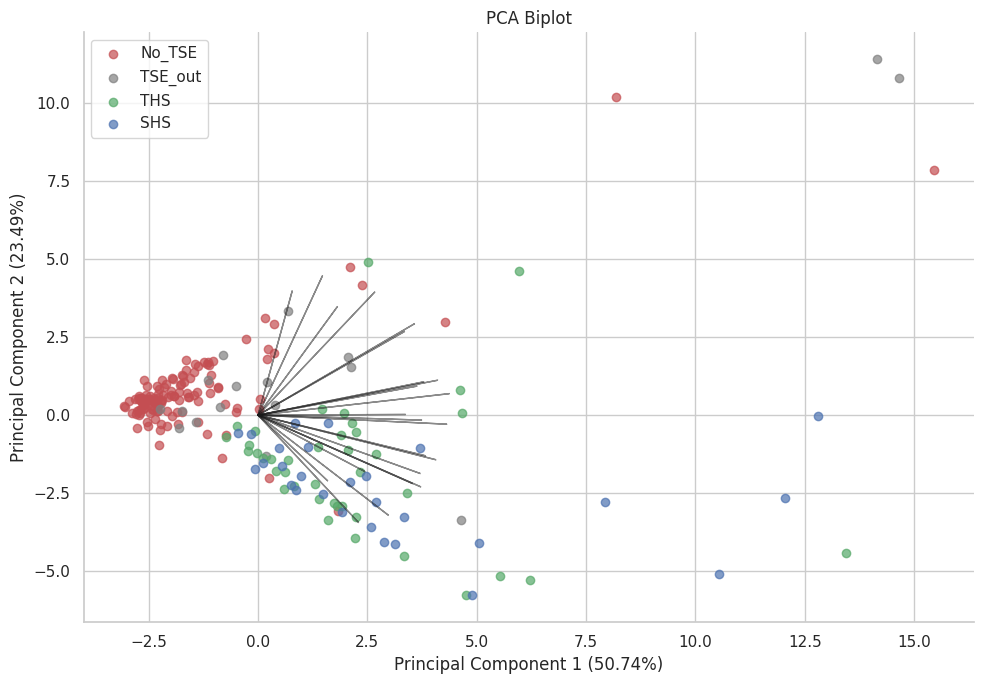

In [72]:
# Exploratory biplot-PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

groups = conc['Groups_encoded']
id = met_stat['ID']
data_without_groups = conc.drop(columns=['Groups_encoded', 'ID', 'Exposure_Group'])
scaled_data = StandardScaler().fit_transform(data_without_groups)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_ * 100  # Variance explained by each PC
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Group'] = groups
pca_df['ID'] = id
plt.figure(figsize=(10, 7))

# Group mapping (numeric group codes to labels)
group_mapping = {0: 'No_TSE', 3: 'TSE_out', 2: 'THS', 1: 'SHS'}
color_palette = {0: 'r', 3: 'grey', 2: 'g', 1: 'b'}

for code, group in group_mapping.items():
    plt.scatter(pca_df[pca_df['Group'] == code]['PC1'],
                pca_df[pca_df['Group'] == code]['PC2'],
                alpha=0.7,
                color=color_palette[code],
                label=group)

# Add arrows and variable names for the variables
for j in range(pca.components_.shape[1]):
    plt.arrow(0, 0, pca.components_[0, j] * max(pca_df['PC1']),
              pca.components_[1, j] * max(pca_df['PC2']),
              color='k', alpha=0.5)
    #plt.text(pca.components_[0, j] * max(pca_df['PC1']) * 1.1,
             #pca.components_[1, j] * max(pca_df['PC2']) * 1.1,
             #data_without_groups.columns[j], color='k', ha='center', va='center', fontsize= 8)"""

# Customize plot
plt.title('PCA Biplot')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}%)')
plt.grid(True)
plt.legend(loc='best')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


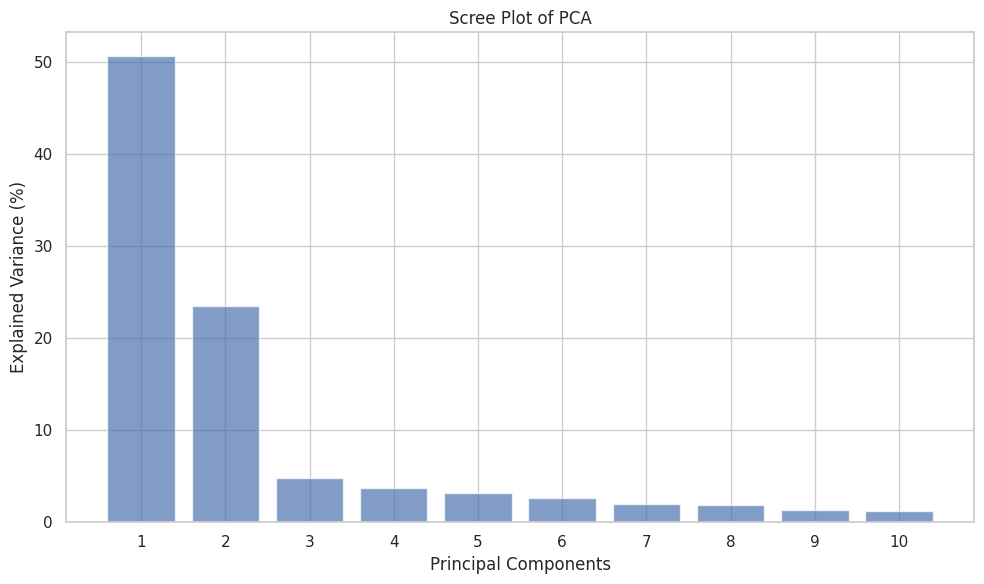

In [73]:

# Perform PCA with 10 components
pca = PCA(n_components=10)
principal_components = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_ * 100  # Variance explained by each PC

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(10)])
pca_df['Group'] = groups
pca_df['ID'] = id

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), explained_variance[:10], alpha=0.7, color='b')
plt.xticks(range(1, 11))
plt.title('Scree Plot of PCA')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

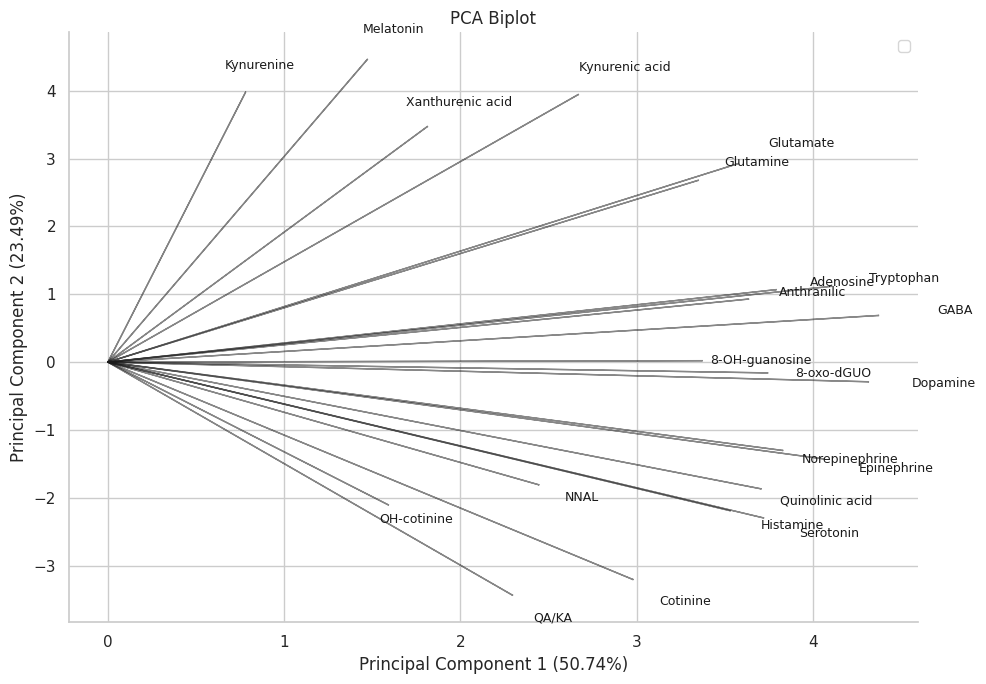

In [74]:
# Add arrows and variable names for the arrows
plt.figure(figsize=(10, 7))
for j in range(pca.components_.shape[1]):
    plt.arrow(0, 0, pca.components_[0, j] * max(pca_df['PC1']),
              pca.components_[1, j] * max(pca_df['PC2']),
              color='k', alpha=0.5)
    plt.text(pca.components_[0, j] * max(pca_df['PC1']) * 1.1,
             pca.components_[1, j] * max(pca_df['PC2']) * 1.1,
             data_without_groups.columns[j], color='k', ha='center', va='center', fontsize= 9)

# Customize plot
plt.title('PCA Biplot')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}%)')
plt.grid(True)
plt.legend(loc='best')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


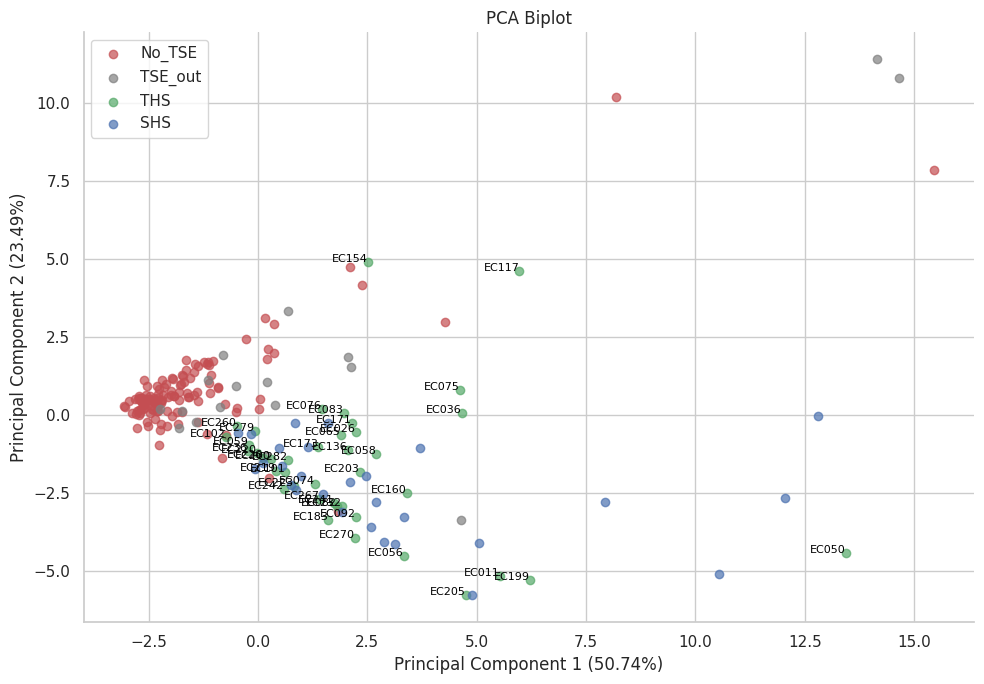

In [75]:
# Searching for THS outliers in the PCA
plt.figure(figsize=(10, 7))

for code, group in group_mapping.items():
    plt.scatter(pca_df[pca_df['Group'] == code]['PC1'],
                pca_df[pca_df['Group'] == code]['PC2'],
                alpha=0.7,
                color=color_palette[code],
                label=group)

# Add IDs to the green points (THS group, code 2)
for i in range(len(pca_df)):
    if pca_df.iloc[i]['Group'] == 2:  # For green points only
        plt.text(pca_df.iloc[i]['PC1'], pca_df.iloc[i]['PC2'],
                 str(pca_df.iloc[i]['ID']), fontsize=8, color='black', ha='right')

# Customize plot
plt.title('PCA Biplot')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}%)')
plt.grid(True)
plt.legend(loc='best')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

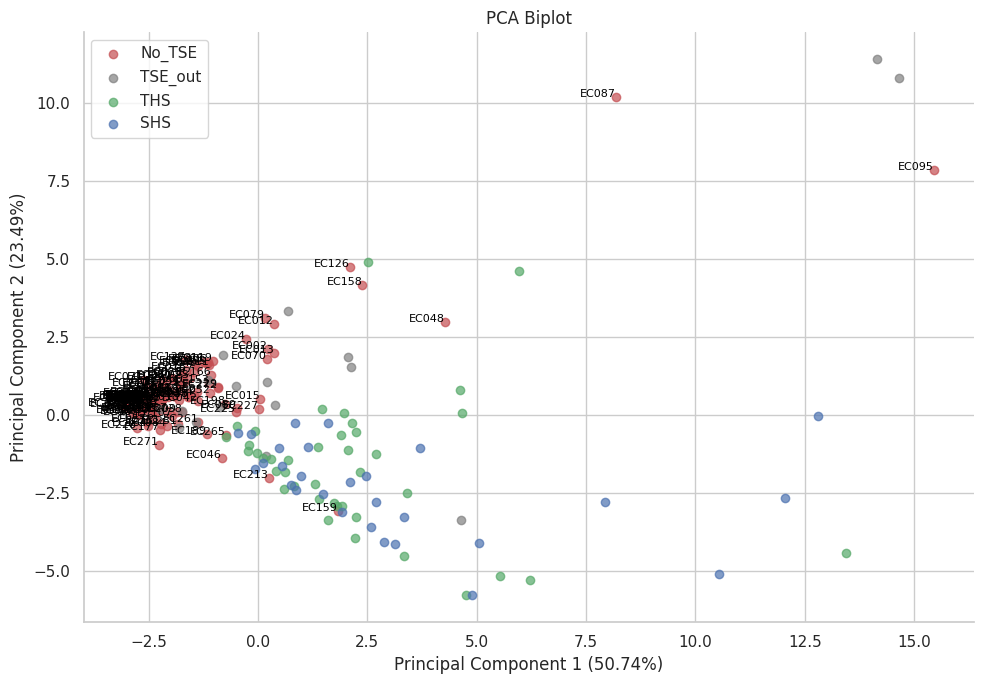

In [76]:
# Searching for No_TSE outliers in the PCA
plt.figure(figsize=(10, 7))
for code, group in group_mapping.items():
    plt.scatter(pca_df[pca_df['Group'] == code]['PC1'],
                pca_df[pca_df['Group'] == code]['PC2'],
                alpha=0.7,
                color=color_palette[code],
                label=group)

# Add IDs to the red points (No_TSE group, code 0)
for i in range(len(pca_df)):
    if pca_df.iloc[i]['Group'] == 0:
        plt.text(pca_df.iloc[i]['PC1'], pca_df.iloc[i]['PC2'],
                 str(pca_df.iloc[i]['ID']), fontsize=8, color='black', ha='right')

# Customize plot
plt.title('PCA Biplot')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}%)')
plt.grid(True)
plt.legend(loc='best')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


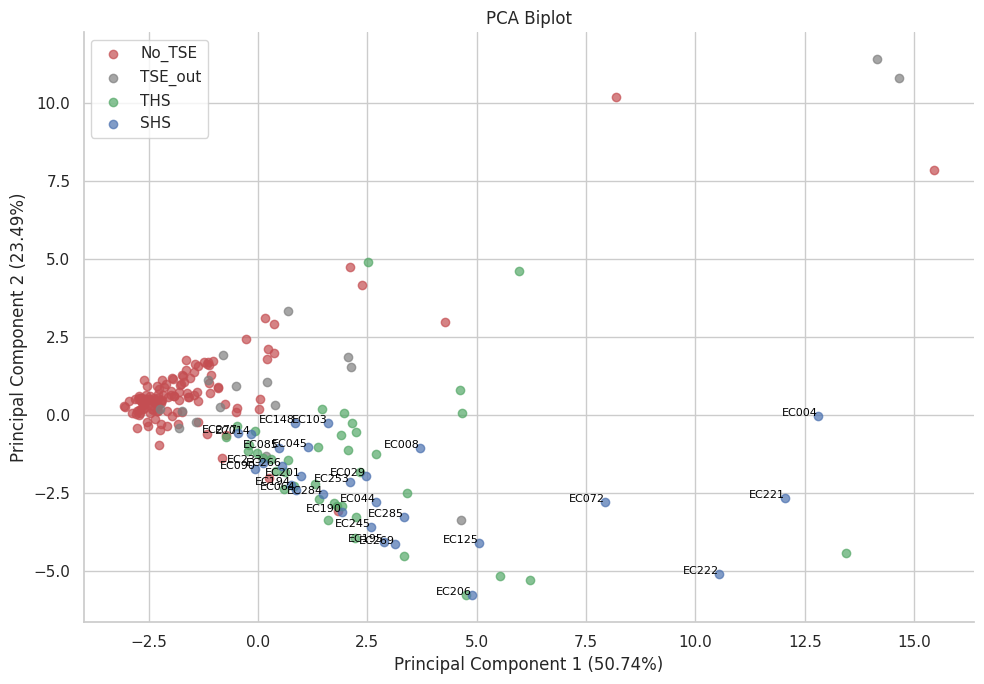

In [77]:
# Searching for SHS outliers in the PCA
plt.figure(figsize=(10, 7))
for code, group in group_mapping.items():
    plt.scatter(pca_df[pca_df['Group'] == code]['PC1'],
                pca_df[pca_df['Group'] == code]['PC2'],
                alpha=0.7,
                color=color_palette[code],
                label=group)

# Add IDs to the blue points (SHS group, code 1)
for i in range(len(pca_df)):
    if pca_df.iloc[i]['Group'] == 1:
        plt.text(pca_df.iloc[i]['PC1'], pca_df.iloc[i]['PC2'],
                 str(pca_df.iloc[i]['ID']), fontsize=8, color='black', ha='right')

# Customize plot
plt.title('PCA Biplot')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}%)')
plt.grid(True)
plt.legend(loc='best')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


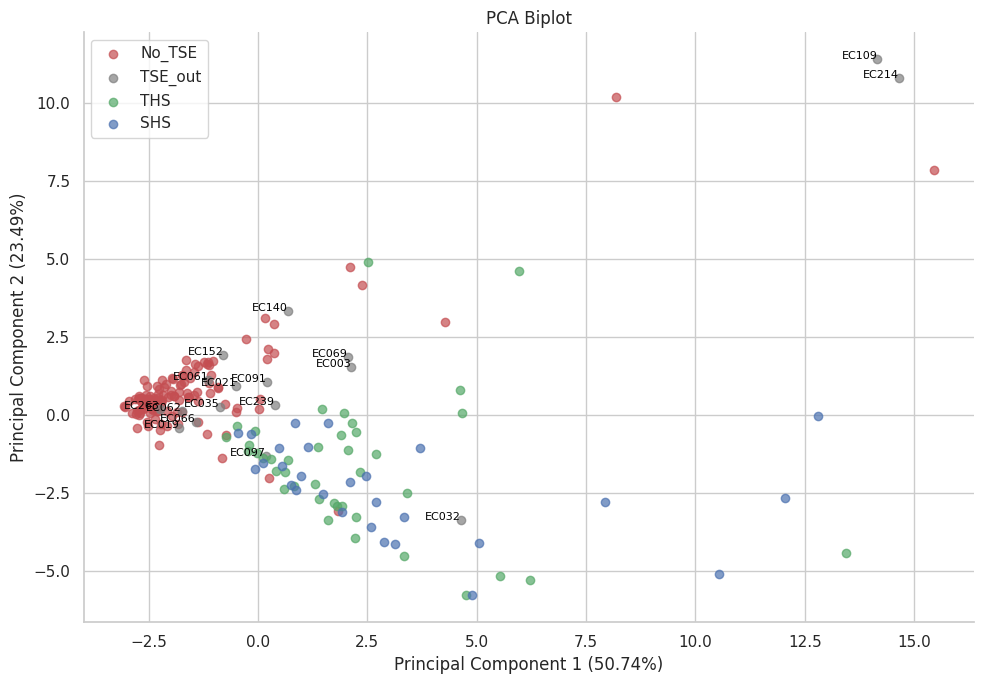

In [78]:
# Searching for TSE_out outliers in the PCA
plt.figure(figsize=(10, 7))
for code, group in group_mapping.items():
    plt.scatter(pca_df[pca_df['Group'] == code]['PC1'],
                pca_df[pca_df['Group'] == code]['PC2'],
                alpha=0.7,
                color=color_palette[code],
                label=group)

# Add IDs to the grey points (TSE_out group, code 3)
for i in range(len(pca_df)):
    if pca_df.iloc[i]['Group'] == 3:
        plt.text(pca_df.iloc[i]['PC1'], pca_df.iloc[i]['PC2'],
                 str(pca_df.iloc[i]['ID']), fontsize=8, color='black', ha='right')

# Customize plot
plt.title('PCA Biplot')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}%)')
plt.grid(True)
plt.legend(loc='best')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [79]:
# Groups datasets to represent the outliers
conc['ID'] = id
outliers_dict = {
    0: ['EC087', 'EC095', 'EC048', 'EC126', 'EC158', 'EC159', 'EC213'],
    1: ['EC004', 'EC221', 'EC222', 'EC072'],
    2: ['EC154', 'EC117', 'EC050', 'EC075', 'EC036'],
    3: ['EC109', 'EC214', 'EC032']}

group_0 = pd.concat([conc[conc['ID'].isin(outliers_dict[0])], conc[(conc['Groups_encoded'] == 0) & (~conc['ID'].isin(outliers_dict[0]))]])
group_1 = pd.concat([conc[conc['ID'].isin(outliers_dict[1])], conc[(conc['Groups_encoded'] == 1) & (~conc['ID'].isin(outliers_dict[1]))]])
group_2 = pd.concat([conc[conc['ID'].isin(outliers_dict[2])], conc[(conc['Groups_encoded'] == 2) & (~conc['ID'].isin(outliers_dict[2]))]])
group_3 = pd.concat([conc[conc['ID'].isin(outliers_dict[3])], conc[(conc['Groups_encoded'] == 3) & (~conc['ID'].isin(outliers_dict[3]))]])

print("Group 0 - Outliers at the beggining:")
print(group_0.head())


Group 0 - Outliers at the beggining:
        ID  Exposure_Group  Groups_encoded  8-oxo-dGUO  8-OH-guanosine  \
39   EC048               0               0    7.193018        3.645556   
77   EC087               0               0   12.511318        1.128140   
85   EC095               0               0    0.376047        8.628527   
106  EC126               0               0    9.067986        0.564070   
115  EC159               0               0    6.932556        3.858935   

       Adenosine  Anthranilic   Cotinine     Dopamine  Epinephrine  ...  \
39   1574.658263   938.855589   1.289796  1059.726090   244.191802  ...   
77   1989.556968     0.376047   1.504186  1125.417088   247.635771  ...   
85   2235.507221  2536.128912   5.571938  2012.937199   523.373015  ...   
106   843.339517  1355.256913   0.752093   559.523672    95.547234  ...   
115   852.513671  1452.339832  16.205938   635.057560   195.358848  ...   

       Kynurenine   Melatonin      NNAL  Norepinephrine  OH-cotinin

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the Z-score for each value in the dataframe
def calculate_z_score(df):
    z_scores = (df - df.mean()) / df.std()
    return z_scores

# Create a clustered heatmap for each group with 'ID' as the y-axis
for i, group in enumerate([group_0, group_1, group_2, group_3]):
    group2 = group.drop(columns=['Groups_encoded', 'ID'])
    z_scores = calculate_z_score(group2)

    # Handle NaN and inf values
    z_scores = z_scores.replace([np.inf, -np.inf], np.nan).fillna(0)
    z_scores.index = group['ID']

    # Use clustermap to add hierarchical clustering
    sns.clustermap(z_scores, cmap='coolwarm', annot=True, fmt='.2f', figsize=(17, 17),
                   row_cluster=True, col_cluster=True)

    plt.title(f'Clustered Heatmap of Z-scores for Group {i}', pad=130)  # pad adjusts title positioning
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

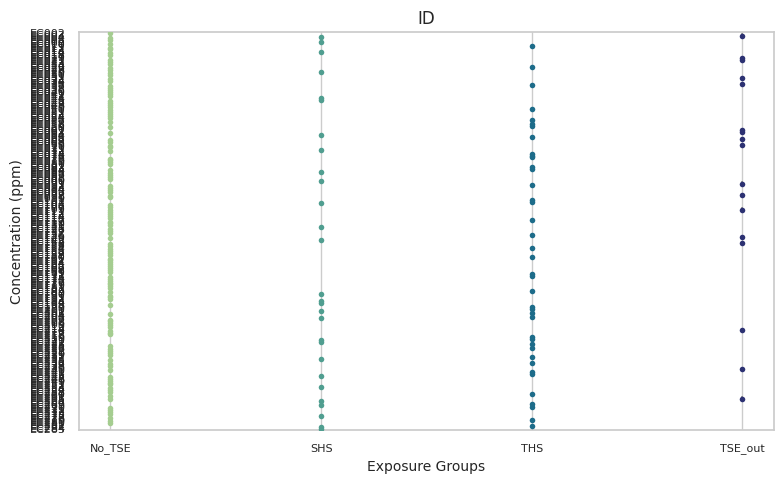

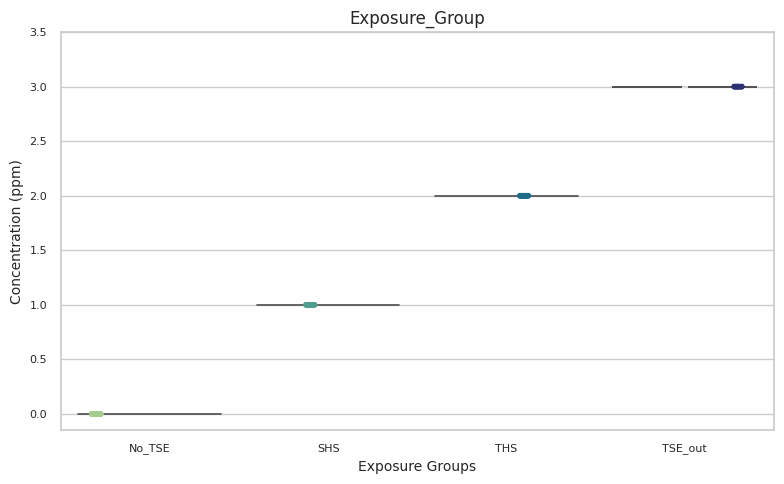

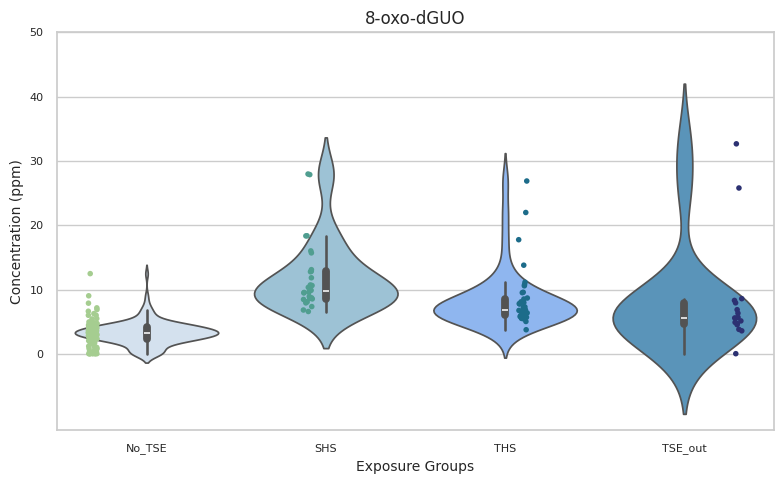

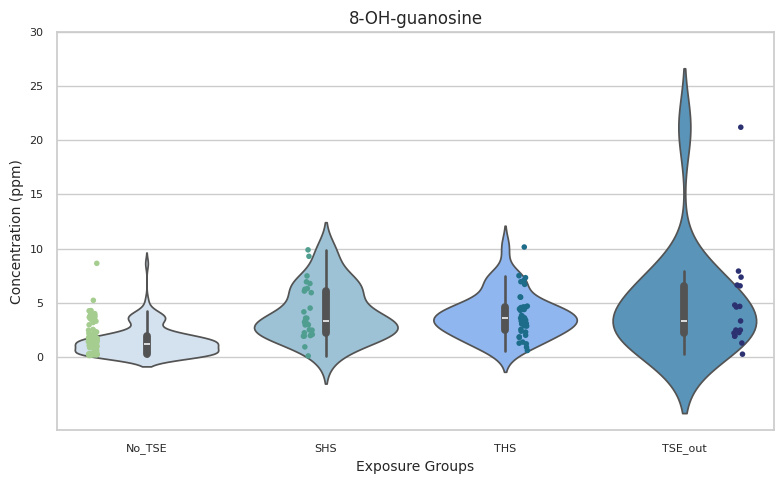

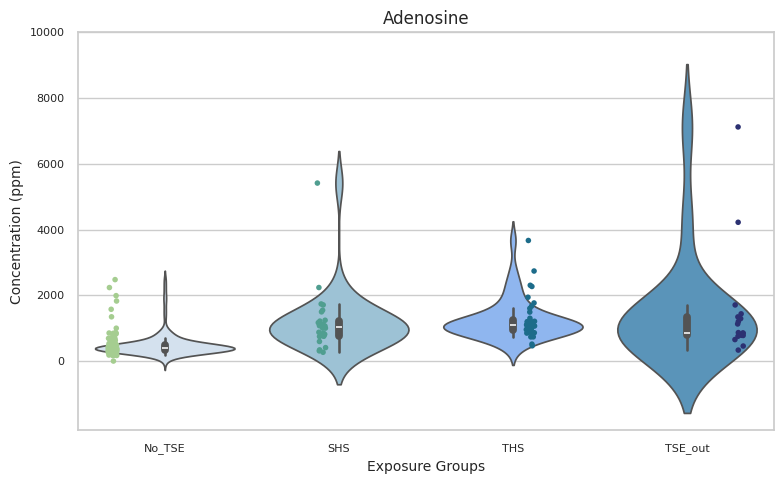

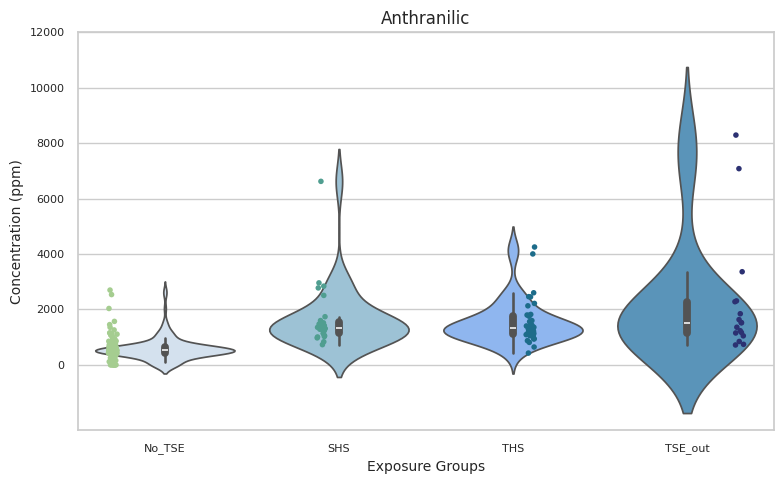

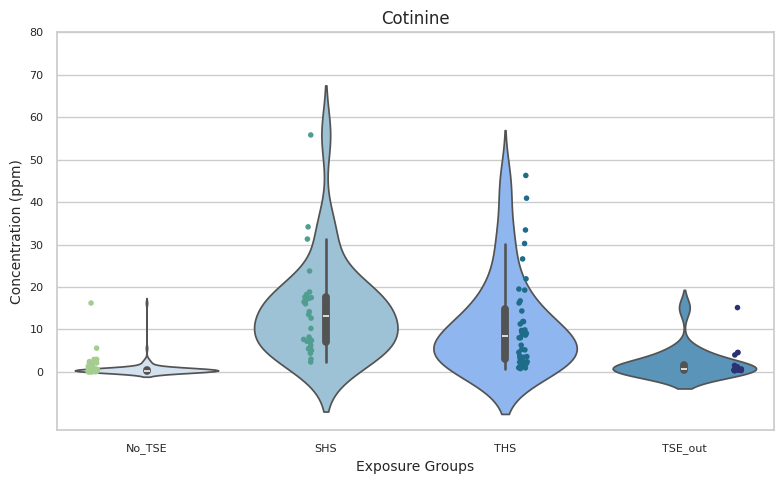

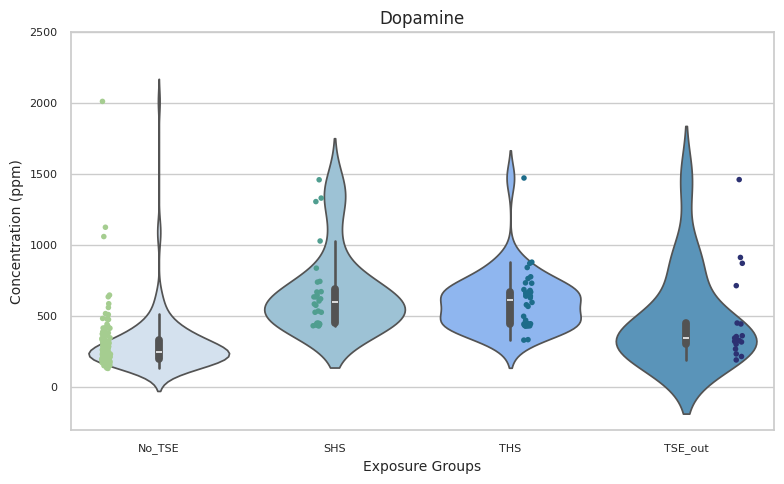

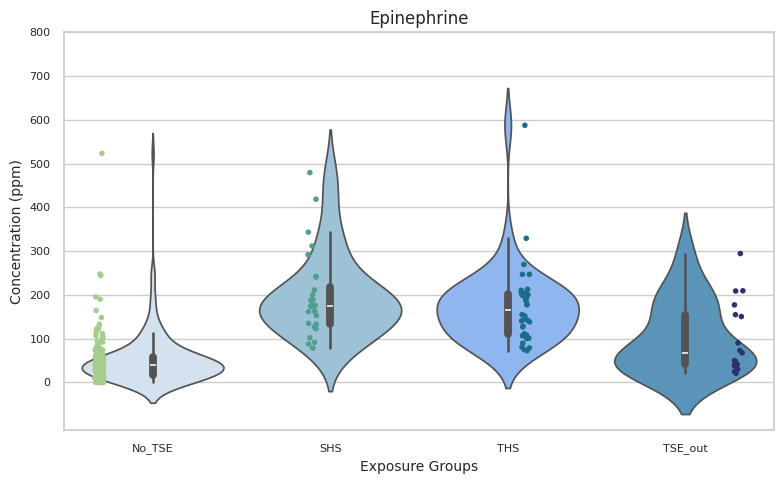

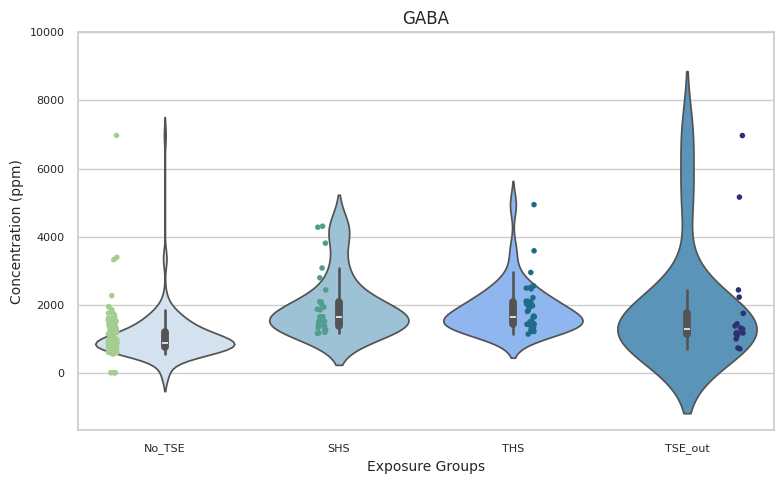

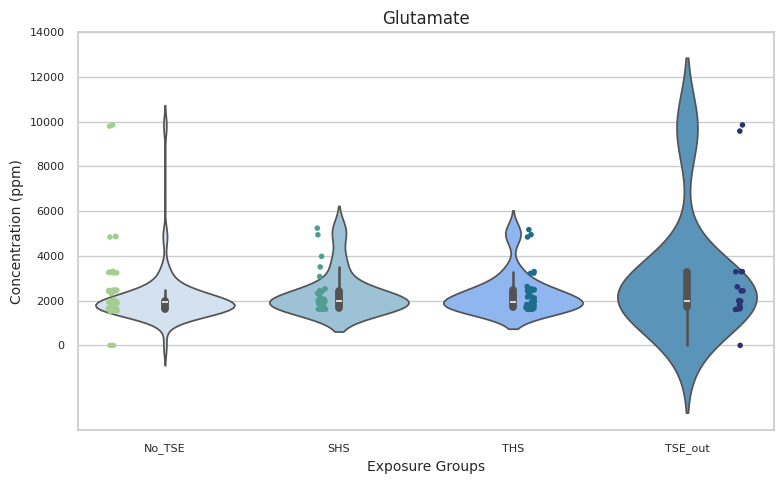

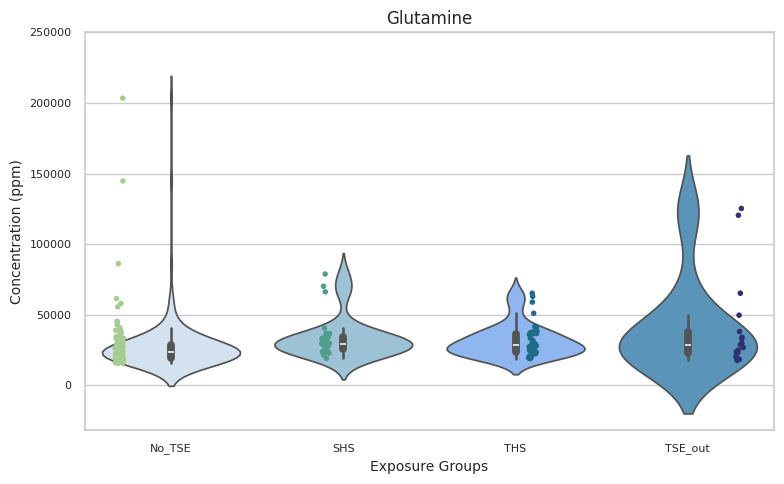

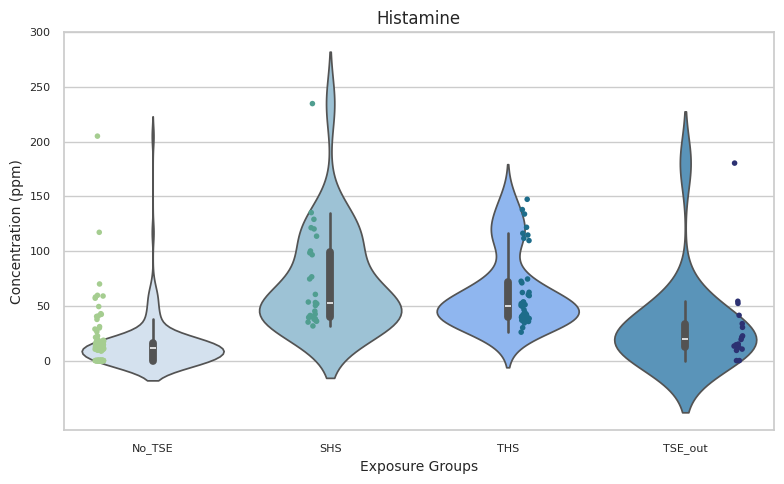

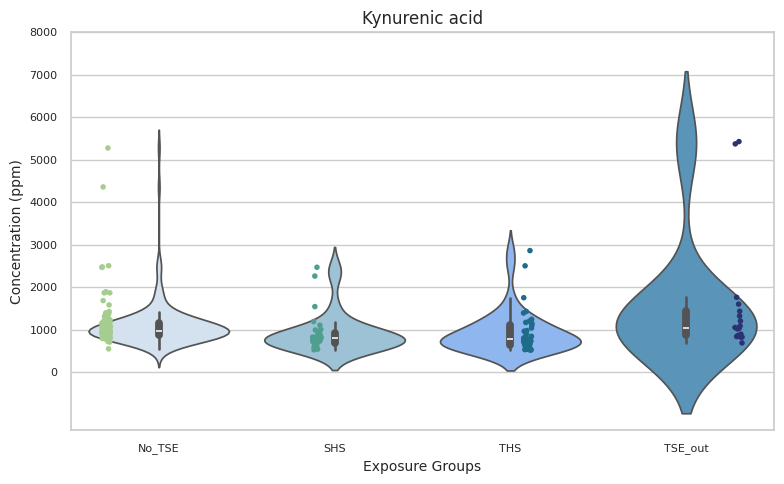

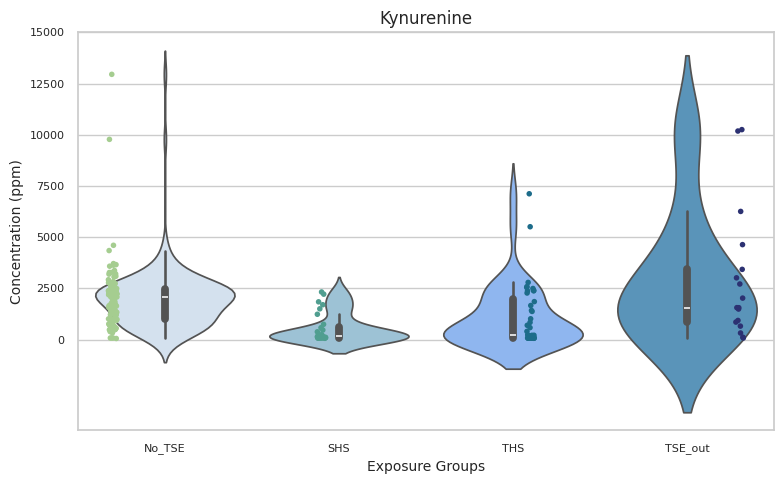

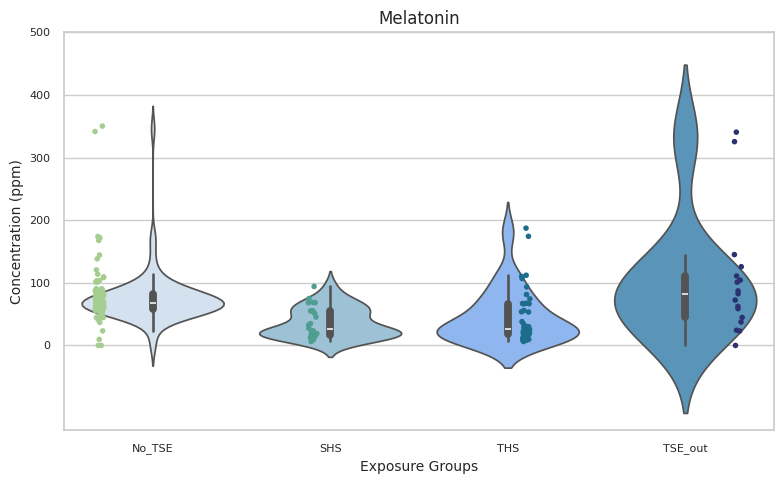

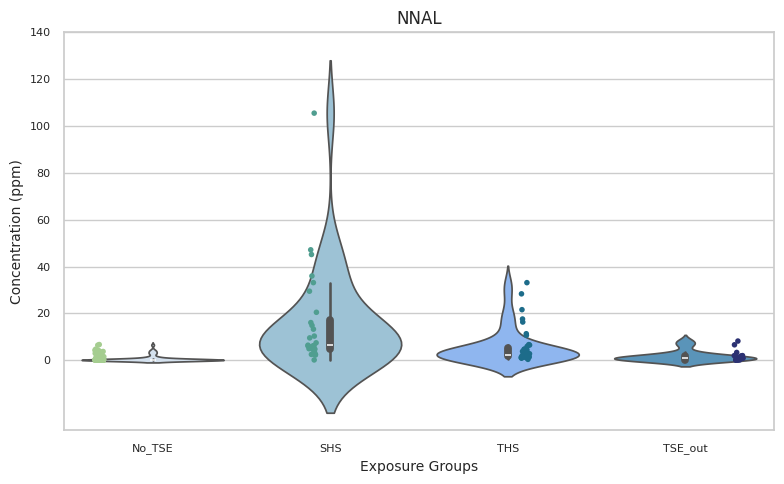

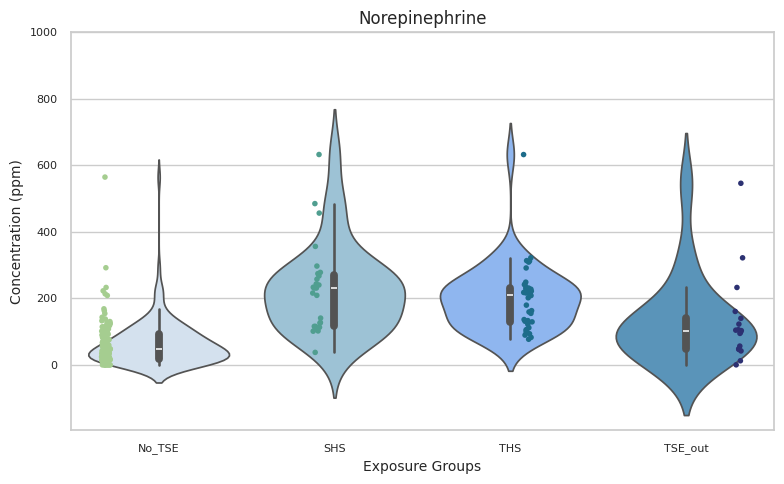

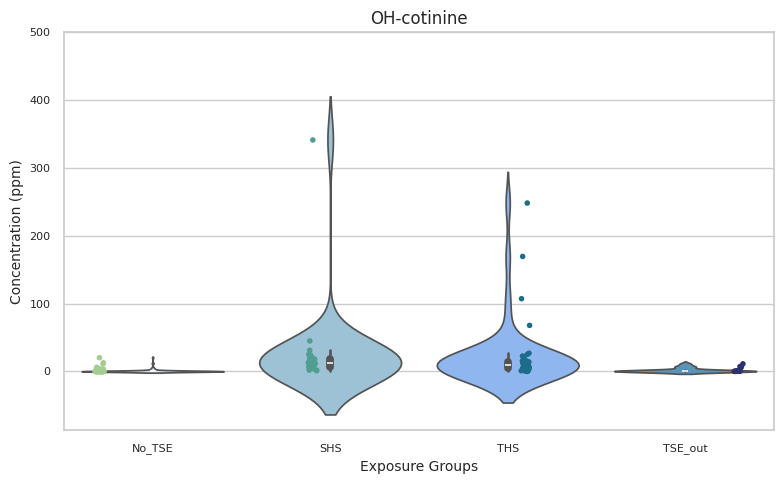

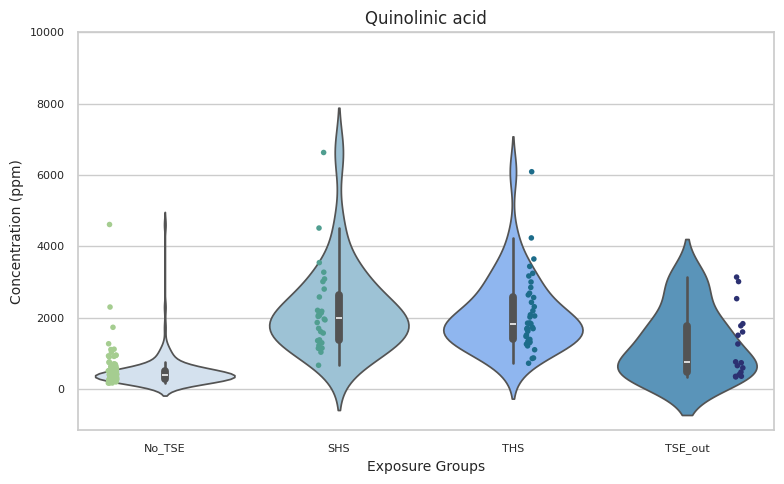

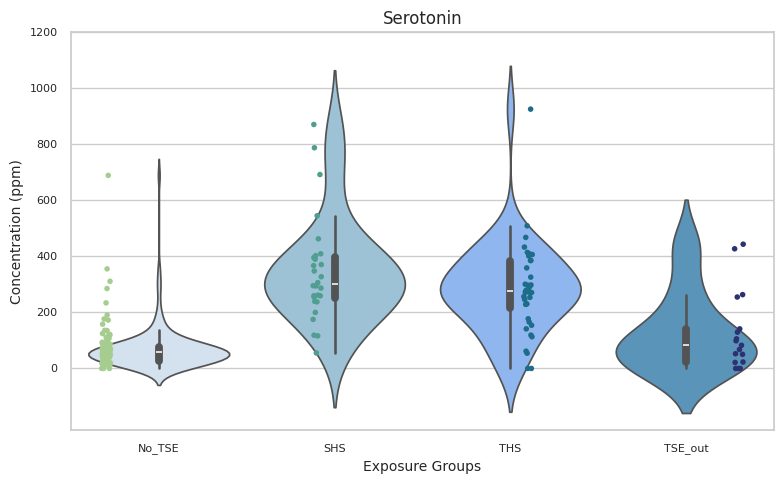

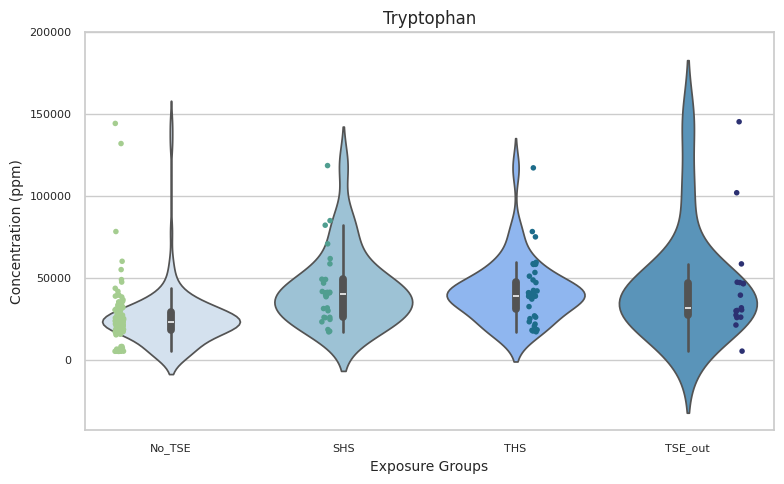

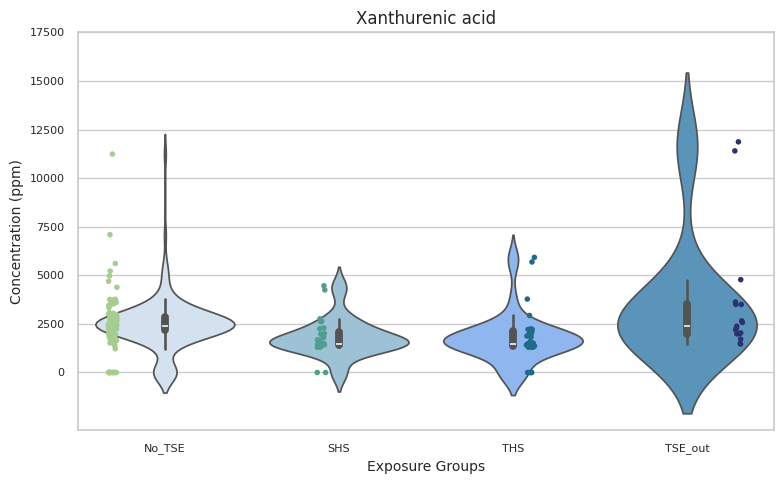

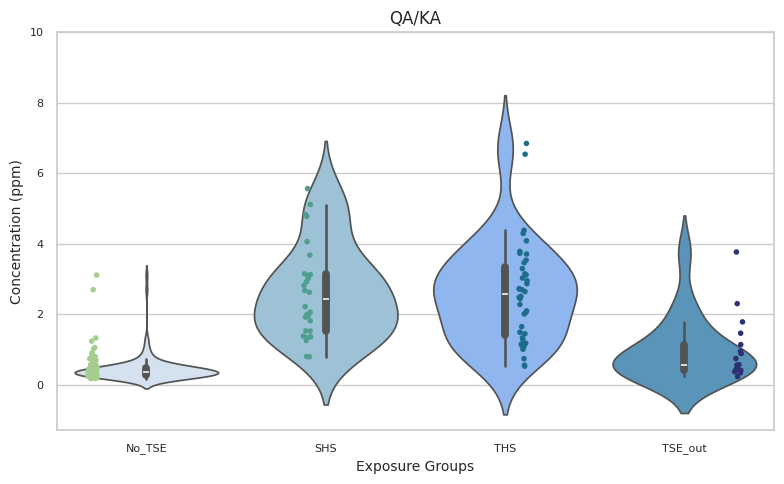

In [81]:
# Violin plots to visually represent the difference between exposure groups
metabolites = conc.columns.drop('Groups_encoded', 'ID')
sns.set(style="whitegrid", palette="Blues")
palette = sns.color_palette("Blues", 4)
palette[-1] = (0.5, 0.7, 1.0)
reordered_palette = [palette[0], palette[1], palette[3], palette[2]]


# Create individual violin plots for each metabolite
for metabolite in metabolites:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='Groups_encoded', y=metabolite, data=conc,
                   hue='Groups_encoded', palette=reordered_palette, legend=False)
    sns.stripplot(x='Groups_encoded', y=metabolite, data=conc,
                  hue='Groups_encoded', palette='crest', size=4, jitter=True,
                  dodge=True)

    plt.xticks(ticks=[0, 3, 2, 1], labels=[group_mapping[0],group_mapping[3], group_mapping[2], group_mapping[1]], fontsize=8)
    plt.title(f'{metabolite}', fontsize=12)
    plt.xlabel('Exposure Groups', fontsize=10)
    plt.ylabel('Concentration (ppm)', fontsize=10)
    current_yticks = plt.gca().get_yticks()
    plt.yticks([ytick for ytick in current_yticks if ytick >= 0], fontsize=8)
    plt.legend([], [], frameon=False)
    plt.tight_layout()
    plt.show()

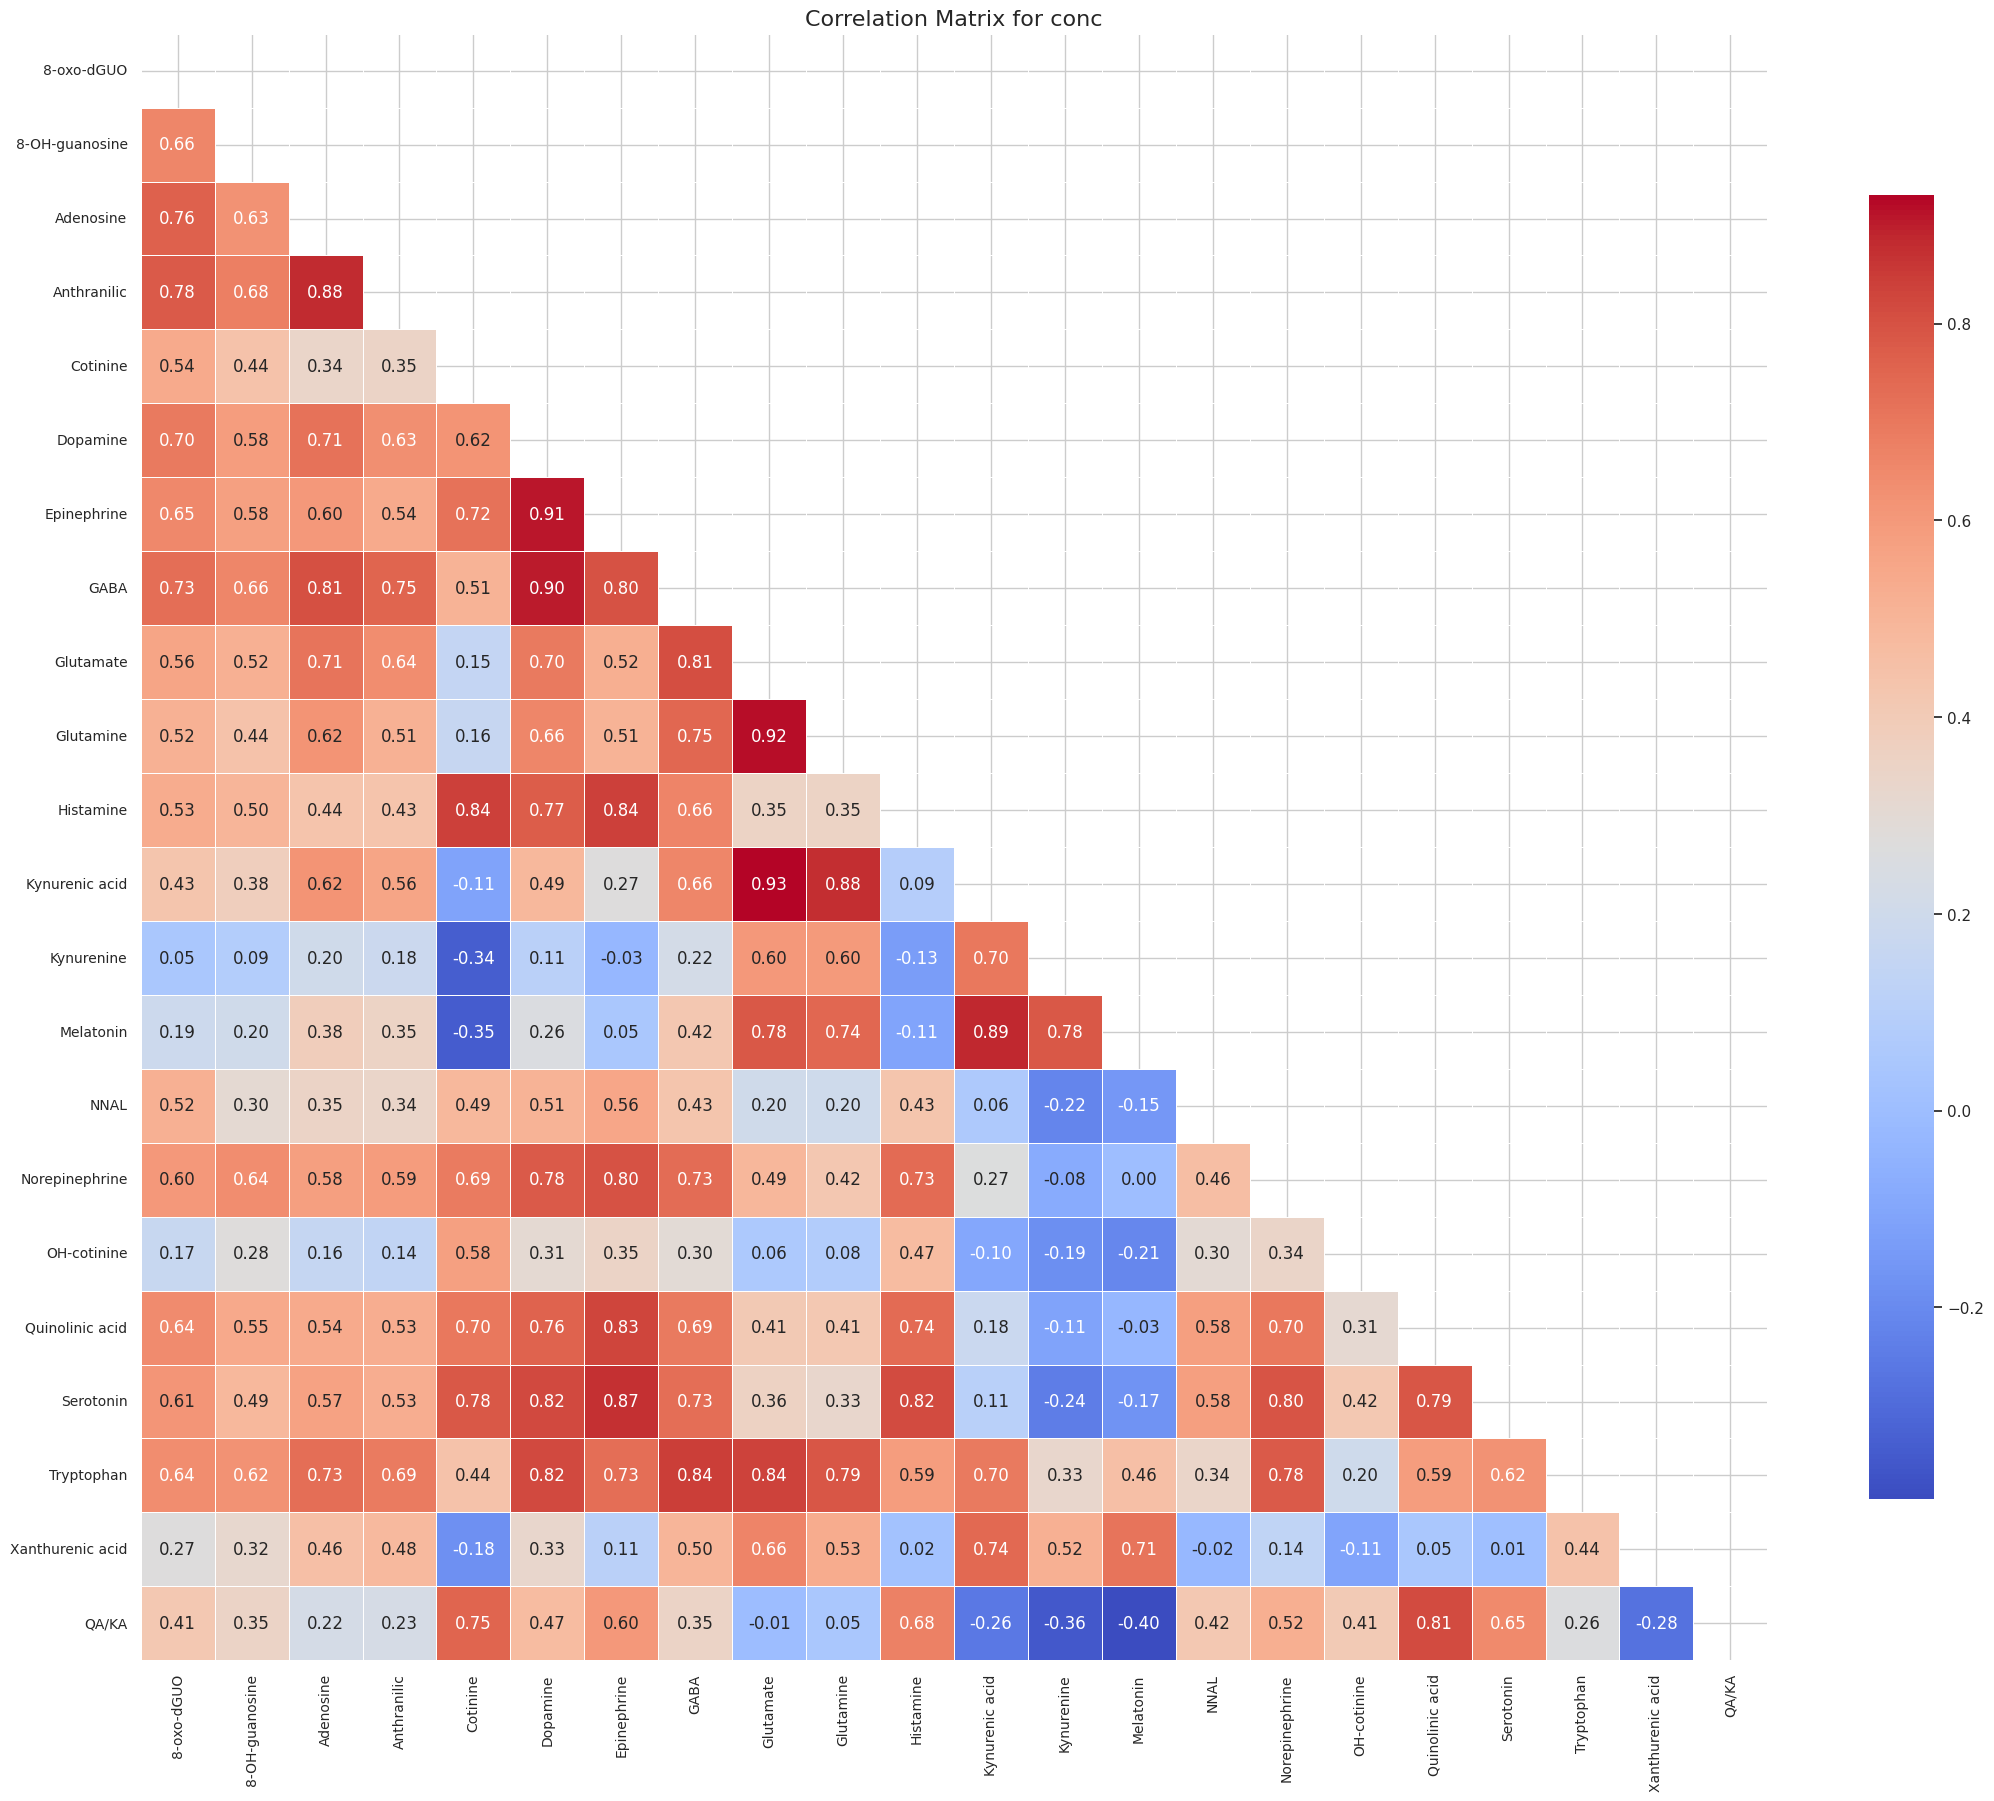

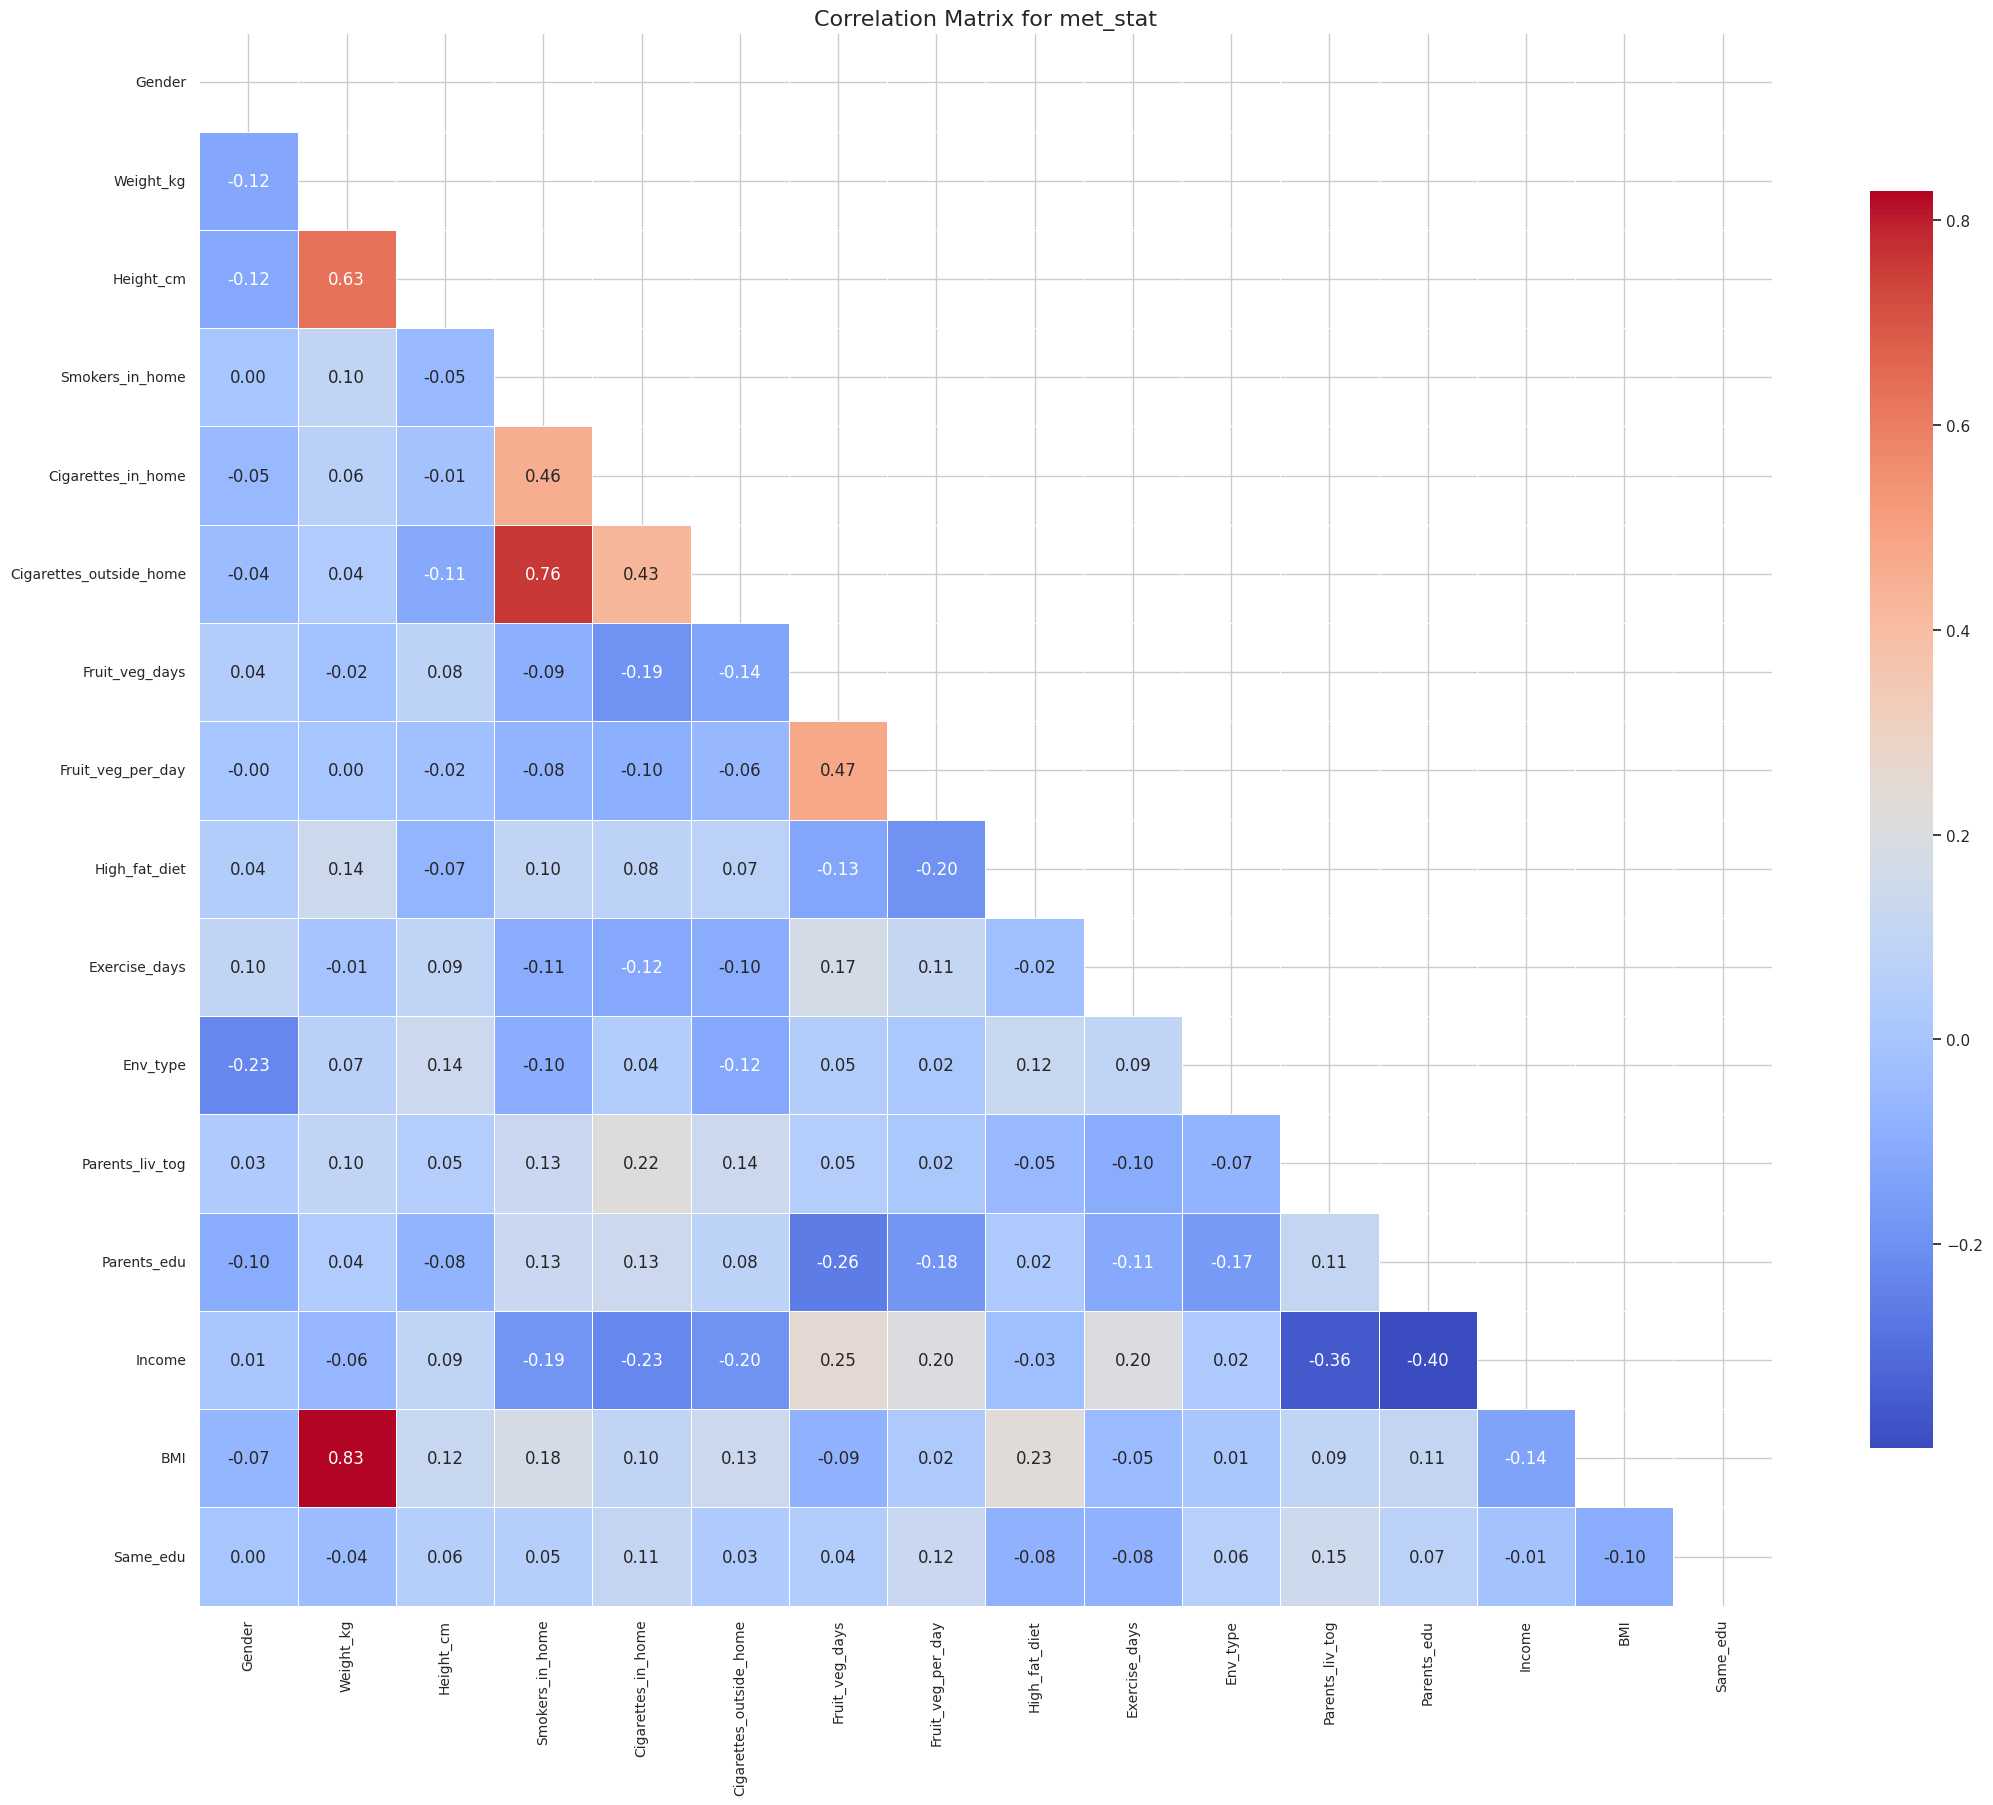

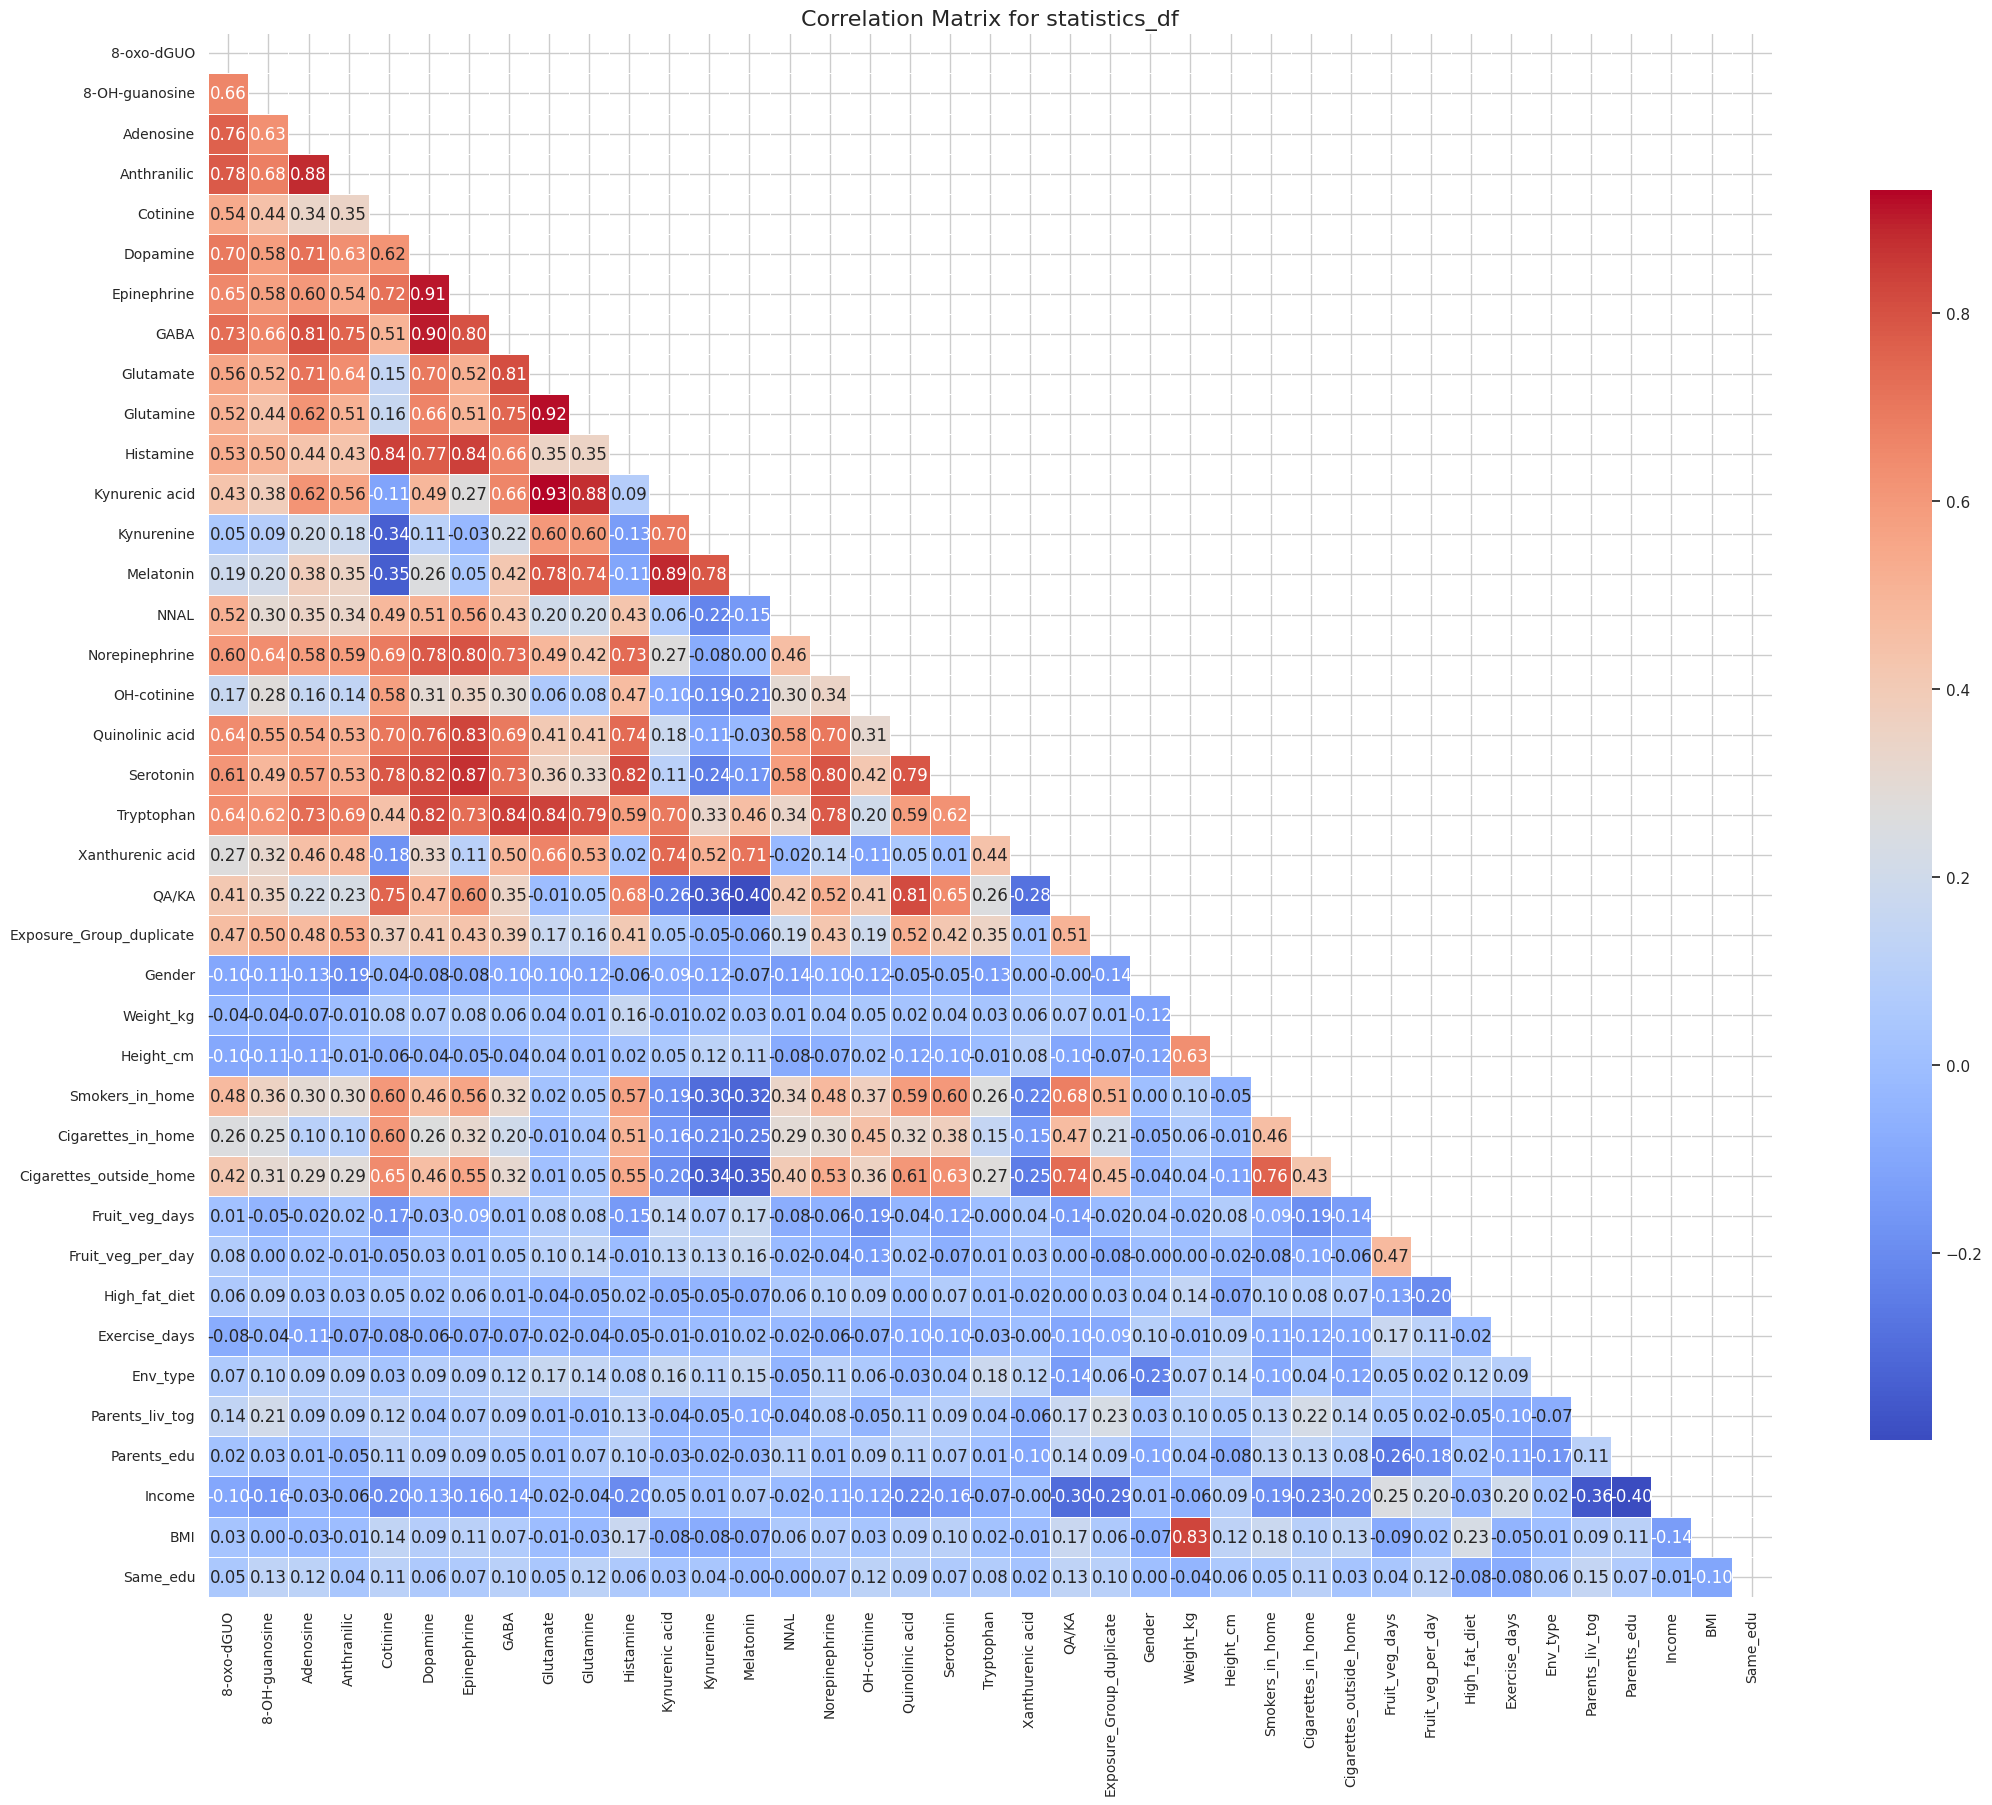

In [82]:
# Correlation matrices for each dataset: metabolites, metadata and both combined
datasets = {
    "conc": conc,
    "met_stat": met_stat,
    "statistics_df": statistics_df}

columns_to_drop = ['Groups_encoded', 'ID', 'Sample', 'Exposure_Group']
for name, dataset in datasets.items():
    dataset.drop(columns=[col for col in columns_to_drop if col in dataset.columns], inplace=True)


for name, dataset in datasets.items():
    corr_matrix = dataset.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    plt.figure(figsize=(22, 18))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True,
                cbar=True, cbar_kws={"shrink": .8}, linewidths=0.5)
    plt.title(f'Correlation Matrix for {name}', fontsize=16)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()

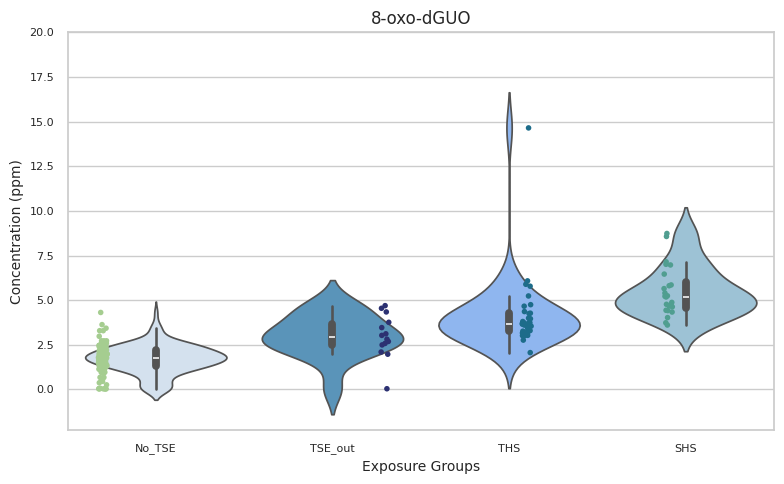

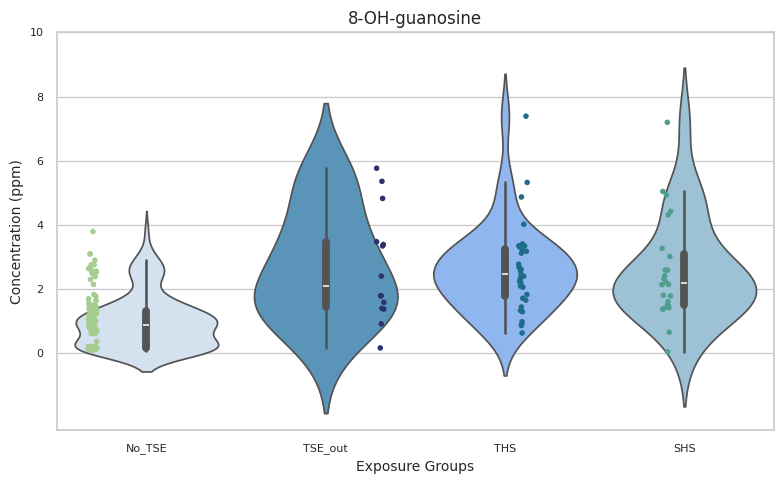

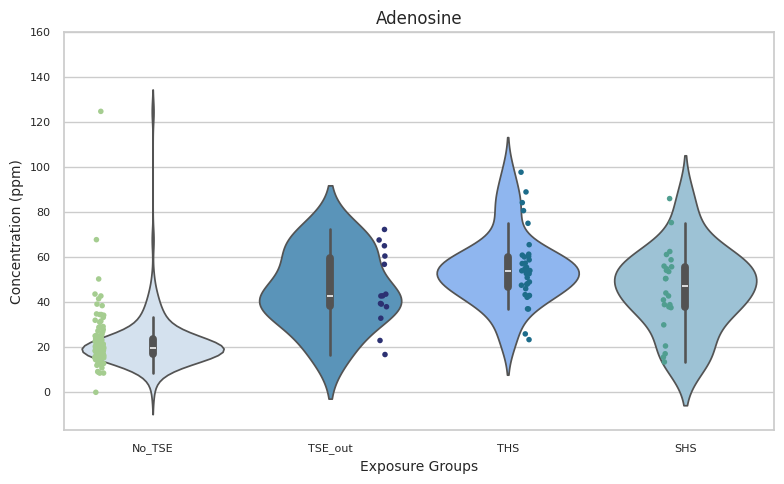

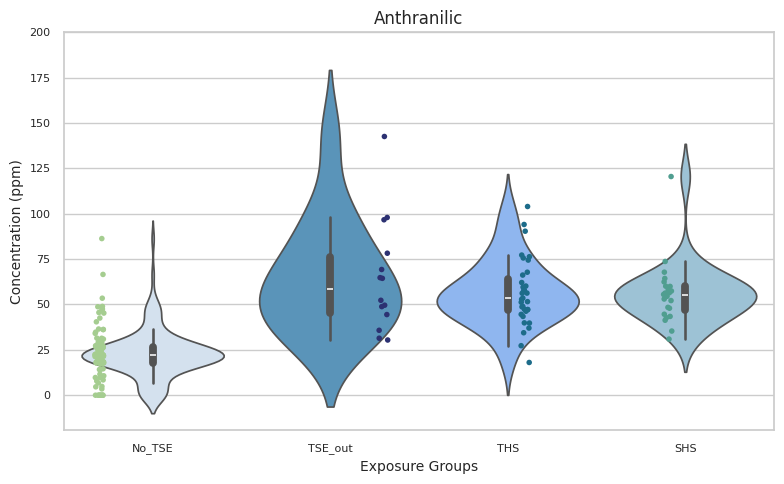

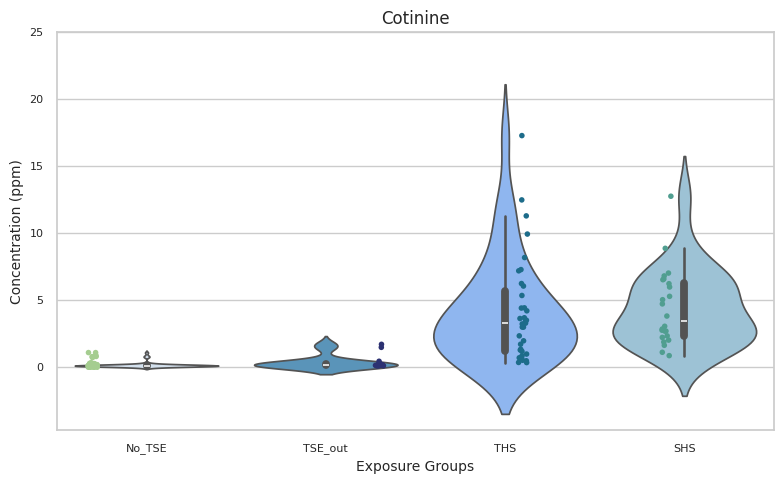

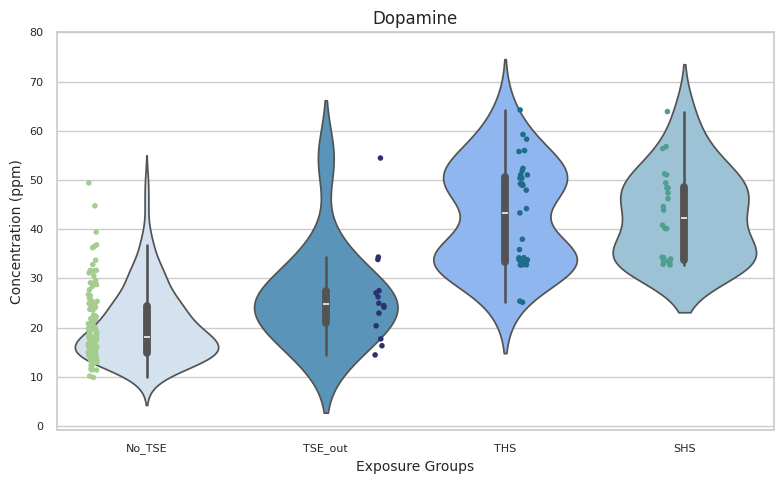

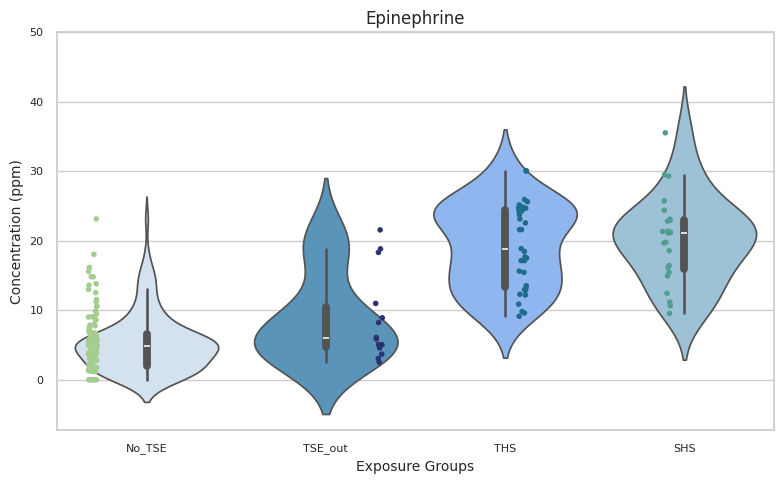

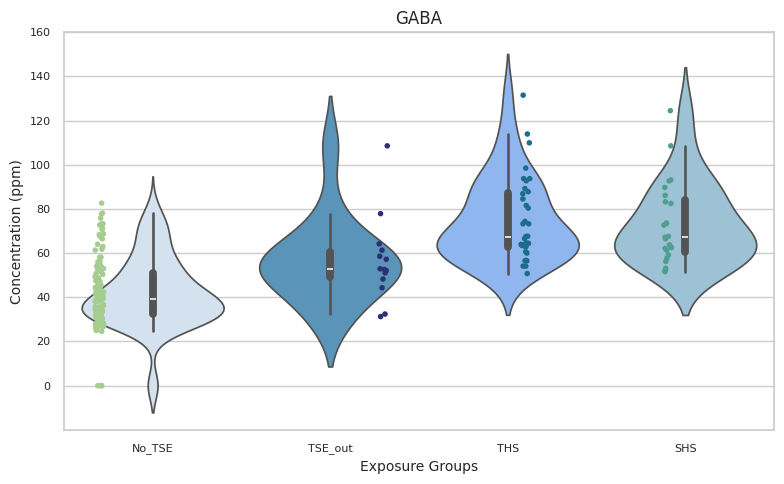

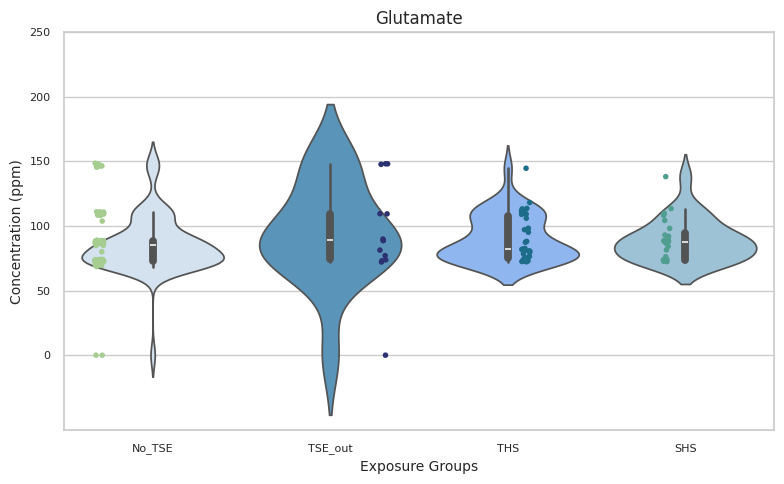

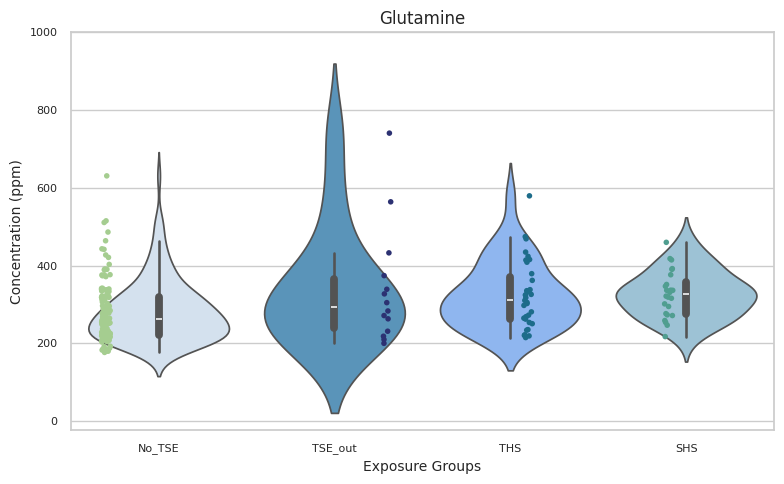

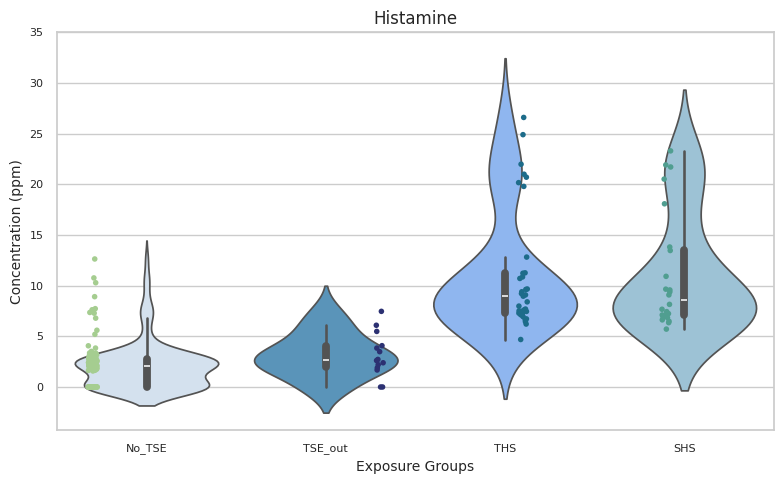

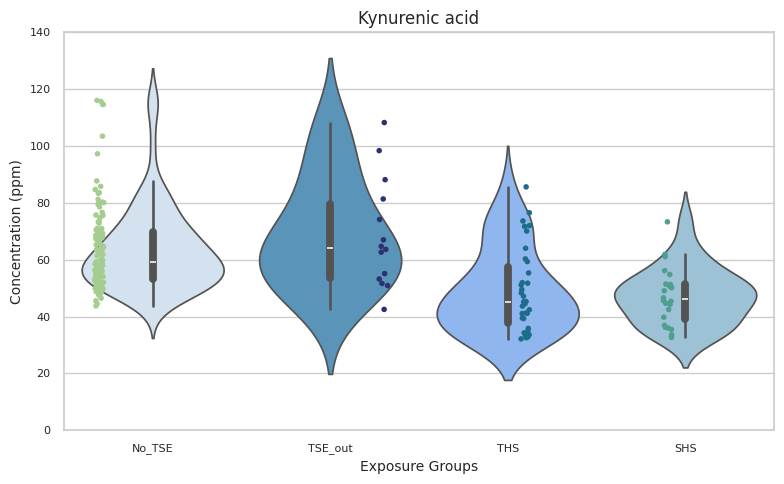

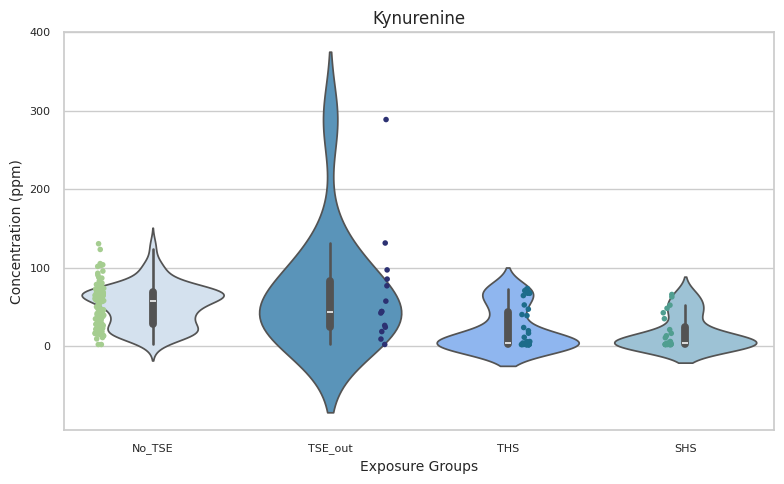

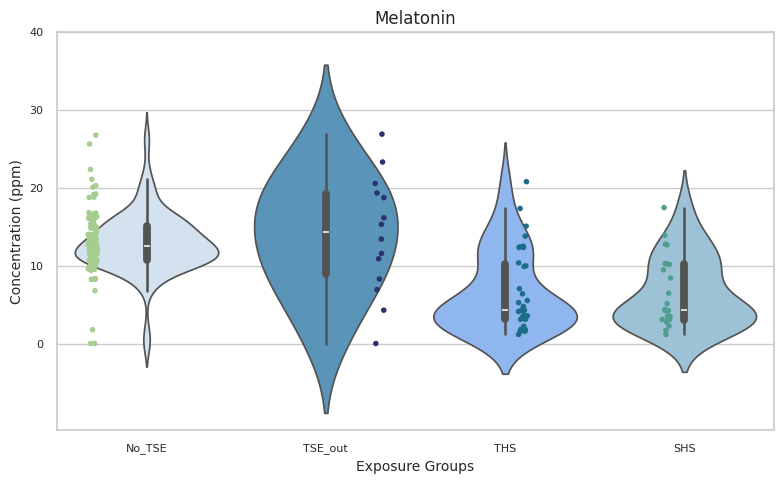

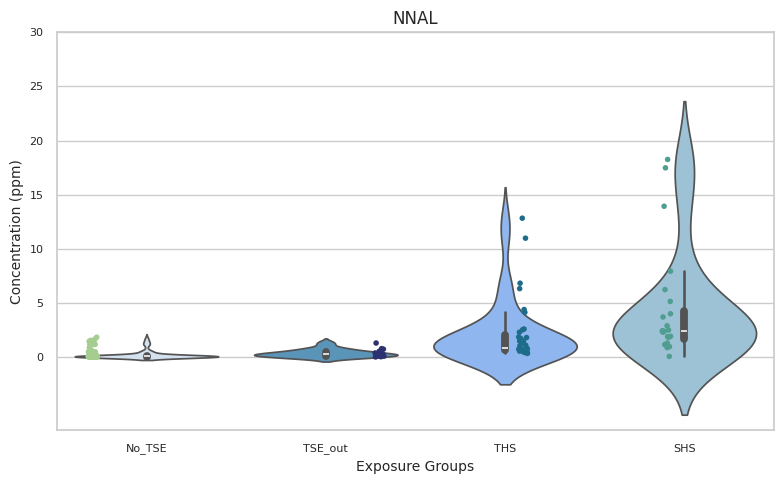

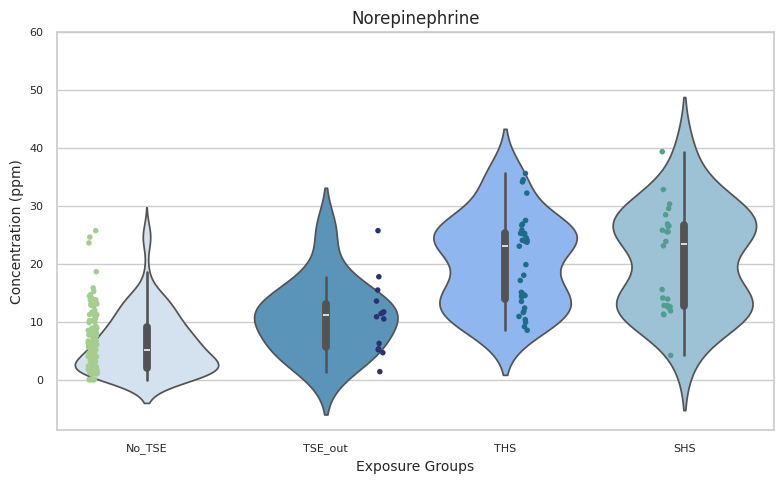

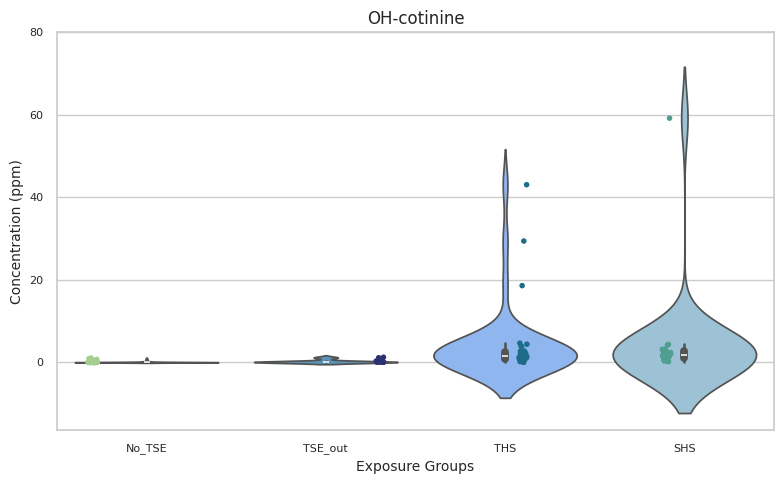

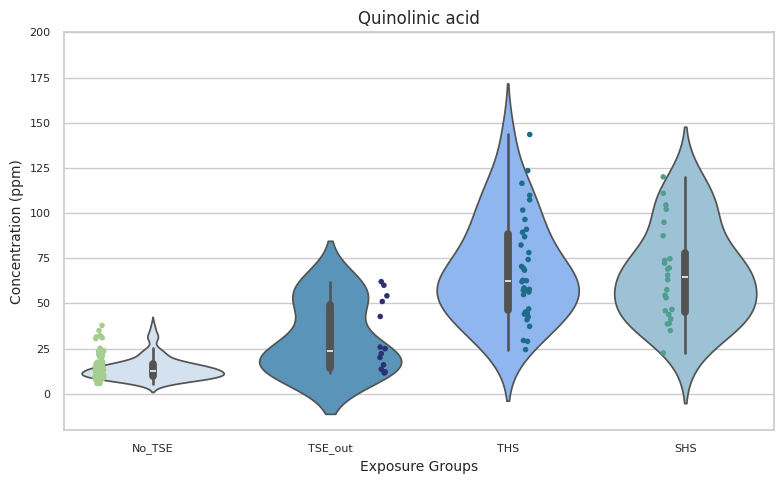

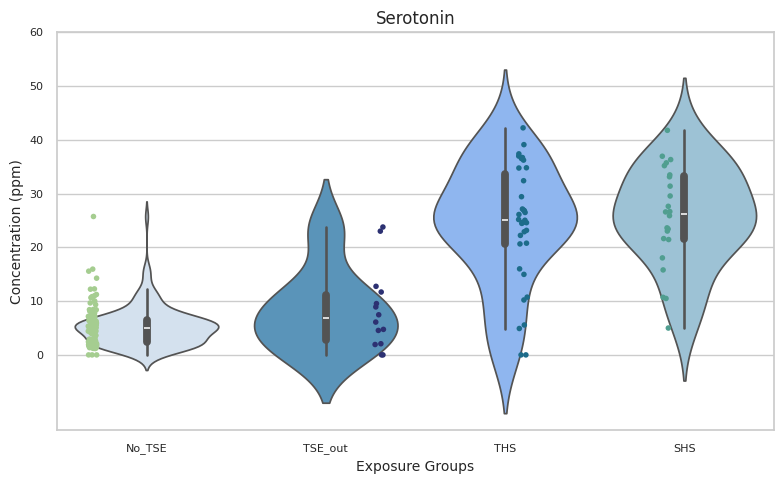

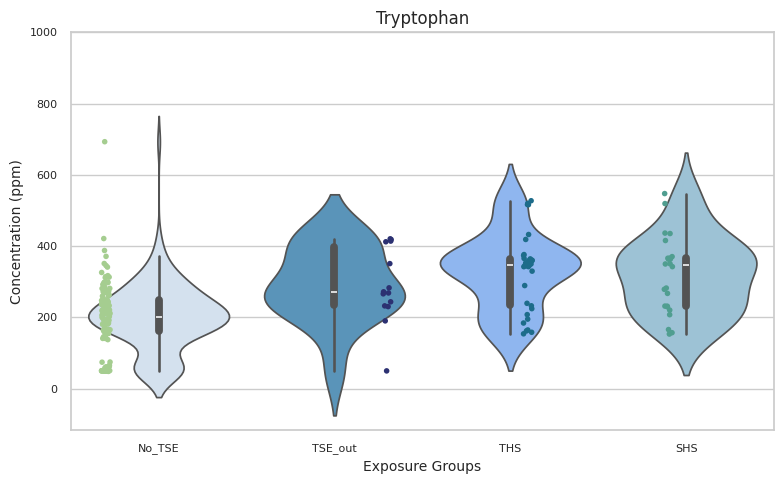

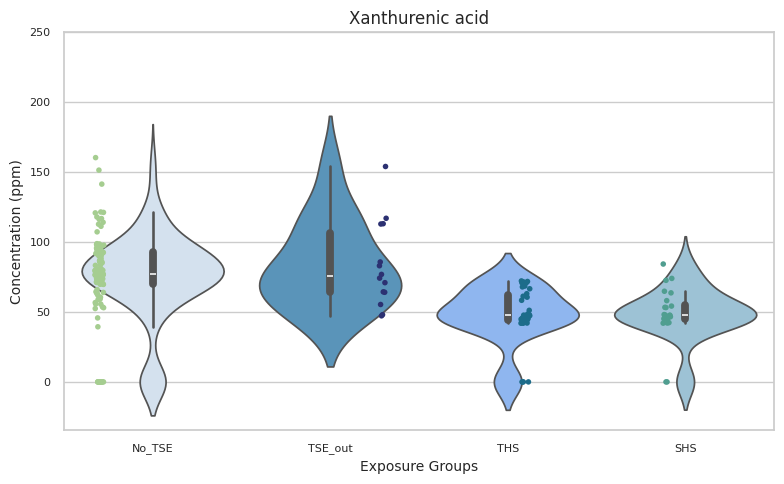

FileNotFoundError: [Errno 2] No such file or directory: '/content/VP_QA/KA.jpg'

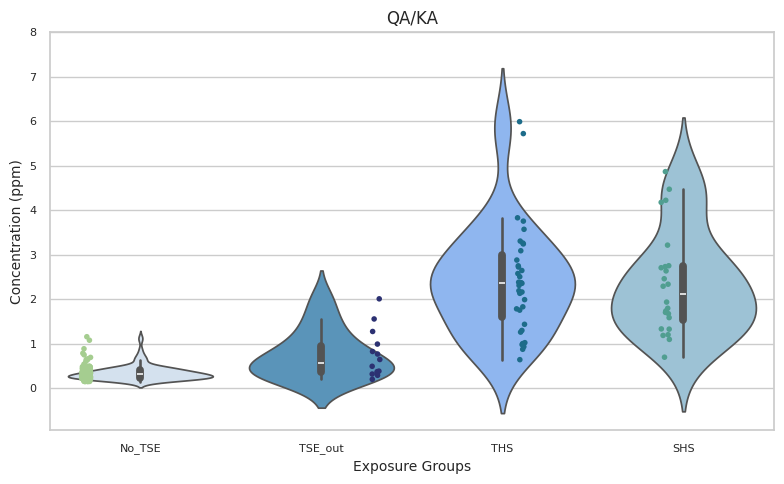

In [83]:
# Filter out outliers, pareto scaling and do violin plots again
met_stat = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Deliverables/metadata_statistics_D1_1.xlsx')
conc['ID'] = met_stat['ID']
conc['Groups_encoded'] = met_stat['Exposure_Group']
outlier_ids = [item for sublist in outliers_dict.values() for item in sublist]
filtered_conc = conc[~conc['ID'].isin(outlier_ids)].reset_index(drop=True)
metabolites = filtered_conc.columns.drop(['Groups_encoded', 'ID'])

scaled_conc = filtered_conc.copy()

group_order = [0, 3, 2, 1]

for metabolite in metabolites:
    # Pareto Scaling
    scaled_conc[metabolite] = filtered_conc[metabolite] / np.sqrt(filtered_conc[metabolite].std())

sns.set(style="whitegrid", palette="Blues")

for metabolite in metabolites:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='Groups_encoded', y=metabolite, data=scaled_conc,
                   hue='Groups_encoded', palette=reordered_palette, order=group_order, legend=False)
    sns.stripplot(x='Groups_encoded', y=metabolite, data=scaled_conc,
                  hue='Groups_encoded', palette='crest', size=4, jitter=True, order=group_order,
                  dodge=True)

    plt.xticks(ticks=range(len(group_order)), labels=[group_mapping[i] for i in group_order], fontsize=8)
    plt.title(f'{metabolite}', fontsize=12)
    plt.xlabel('Exposure Groups', fontsize=10)
    plt.ylabel('Concentration (ppm)', fontsize=10)
    current_yticks = plt.gca().get_yticks()
    plt.yticks([ytick for ytick in current_yticks if ytick >= 0], fontsize=8)
    plt.legend([], [], frameon=False)
    plt.tight_layout()

    plt.savefig(f'VP_{metabolite}.jpg')
    plt.show()


In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Prepare data
data_to_cluster = conc.drop(columns=['ID', 'Groups_encoded'])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_to_cluster)

# Define the range of parameters to test
eps_values = np.arange(1, 5, 0.01)
min_samples = 3
results = []

# Loop through the eps values
for eps in eps_values:
    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data_scaled)

    # Calculate silhouette score
    if len(set(labels)) > 2:  # Ensure there is more than one cluster
        silhouette_avg = silhouette_score(data_scaled, labels)
    else:
        silhouette_avg = -1  # Assign a low score if only one cluster is found

    # Store the results
    results.append({
        'eps': eps,
        'silhouette_score': silhouette_avg
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find the best parameters based on silhouette score
best_params = results_df.loc[results_df['silhouette_score'].idxmax()]

print("Best parameters for DBSCAN:")
print(f"eps: {best_params['eps']}, silhouette_score: {best_params['silhouette_score']}")

# Optional: Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(results_df['eps'], results_df['silhouette_score'], marker='o')
plt.title('DBSCAN Parameter Optimization (Silhouette Score vs. eps)')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Prepare the data
data_to_analyze = conc.drop(columns=['ID', 'Groups_encoded'])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_to_analyze)

# Initialize Nearest Neighbors to find the nearest one
nbrs = NearestNeighbors(n_neighbors=2)
nbrs.fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)
nearest_distances = distances[:, 1]

# Calculate the 90th percentile distance
percentile_90_distance = np.percentile(nearest_distances, 90)

print(f"The distance to the nearest neighbor for 90% of the samples is: {percentile_90_distance:.4f}")


In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps= 3, min_samples=3)
dbscan_clusters = dbscan.fit_predict(data_scaled)

# PCA for Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['KMeans Cluster'] = kmeans_clusters
pca_df['DBSCAN Cluster'] = dbscan_clusters

# Visualization
plt.figure(figsize=(14, 6))

# K-Means Clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='KMeans Cluster', data=pca_df, palette='Set1', alpha=0.7)
plt.title('K-Means Clustering (4 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-Means Cluster')

# DBSCAN Clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN Cluster', data=pca_df, palette='Set2', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='DBSCAN Cluster')

plt.tight_layout()
plt.show()


In [ ]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

data_to_analyze = conc.drop(columns=['ID', 'Groups_encoded'])
linkage_matrix = linkage(data_to_analyze, method='ward')  # Use 'ward' linkage method

plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(linkage_matrix, labels=data_to_analyze.index, leaf_rotation=90)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering with 4 clusters and euclidean distance and represent it with 2 dim PCA
n_clusters = 4
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = agg_cluster.fit_predict(data_to_analyze)
colors = ['purple', 'orange', 'green', 'blue']
labels = [f'{i+1}' for i in range(n_clusters)]

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_to_analyze)

plt.figure(figsize=(8, 6))
for i, color, label in zip(range(n_clusters), colors, labels):
    plt.scatter(data_2d[cluster_labels == i, 0], data_2d[cluster_labels == i, 1],
                color=color, label=label, edgecolor='k', s=50)

plt.title("Agglomerative Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters")
plt.show()


In [ ]:
len(scaled_conc)

In [ ]:
from scipy import stats

# Normality results list
normality_results = []
log_shift_constant = 1e-8

sns.set(style="whitegrid")
columns_to_analyze = [col for col in scaled_conc.columns if col not in ['ID', 'Groups_encoded']]

# Step 1: Plot density distributions without normality tests
for metabolite in columns_to_analyze:
    if np.issubdtype(scaled_conc[metabolite].dtype, np.number):
        plt.figure(figsize=(18, 6))

        plt.subplot(1, 3, 1)
        sns.kdeplot(scaled_conc[metabolite], fill=True, color='blue', alpha=0.6, lw=2)
        plt.axvline(scaled_conc[metabolite].mean(), color='red', linestyle='--', label='Mean')
        plt.title(f'{metabolite} Non-transformed', fontsize=16)
        plt.ylabel('Density', fontsize=14)
        plt.legend()

        # Log-transformed density plot
        log_transformed_data = np.log(scaled_conc[metabolite])
        plt.subplot(1, 3, 2)
        sns.kdeplot(log_transformed_data, fill=True, color='orange', alpha=0.6, lw=2)
        plt.axvline(log_transformed_data.mean(), color='green', linestyle='--', label='Mean')
        plt.title(f'{metabolite} Log-transformed', fontsize=16)
        plt.ylabel('Density', fontsize=14)
        plt.legend()

        # Box-Cox transformed density plot
        boxcox_transformed_data, lambda_value = stats.boxcox(scaled_conc[metabolite])
        plt.subplot(1, 3, 3)
        sns.kdeplot(boxcox_transformed_data, fill=True, color='purple', alpha=0.6, lw=2)
        plt.axvline(np.mean(boxcox_transformed_data), color='orange', linestyle='--', label='Mean')
        plt.title(f'{metabolite} Boxcox-transformed', fontsize=16)
        plt.ylabel('Density', fontsize=14)
        plt.legend()

        plt.tight_layout()
        plt.show()

# Step 2: Perform normality tests and calculate skewness and kurtosis
for metabolite in columns_to_analyze:
    if np.issubdtype(scaled_conc[metabolite].dtype, np.number):
        # Kolmogorov-Smirnov test on the original data
        stat_original, p_value_original = stats.kstest(scaled_conc[metabolite], 'norm')

        # Kolmogorov-Smirnov test on the log-transformed data
        log_transformed_data = np.log(scaled_conc[metabolite])
        stat_log, p_value_log = stats.kstest(log_transformed_data, 'norm')

        # Kolmogorov-Smirnov test on the Box-Cox transformed data
        boxcox_transformed_data, lambda_value = stats.boxcox(scaled_conc[metabolite])
        stat_boxcox, p_value_boxcox = stats.kstest(boxcox_transformed_data, 'norm')

        # Shapiro-Wilk tests
        shapiro_original = stats.shapiro(scaled_conc[metabolite])
        shapiro_log = stats.shapiro(log_transformed_data)
        shapiro_boxcox = stats.shapiro(boxcox_transformed_data)

        # Calculate skewness and kurtosis
        skewness_original = stats.skew(scaled_conc[metabolite])
        skewness_log = stats.skew(log_transformed_data)
        skewness_boxcox = stats.skew(boxcox_transformed_data)

        normality_results.append({
            "Metabolite": metabolite,
            "Shapiro p-value (non-transformed)": shapiro_original.pvalue,
            "Skewness (non-transformed)": skewness_original,
            "Shapiro p-value (log-transformed)": shapiro_log.pvalue,
            "Skewness (log-transformed)": skewness_log,
            "Shapiro p-value (Boxcox-transformed)": shapiro_boxcox.pvalue,
            "Skewness (Boxcox-transformed)": skewness_boxcox,
            })

# Create a DataFrame for normality results
normality_results_df = pd.DataFrame(normality_results)
print(normality_results_df)


In [ ]:
# Create a DataFrame to hold the Box-Cox transformed data
boxcox_transformed_df = pd.DataFrame()

for metabolite in columns_to_analyze:
    if np.issubdtype(scaled_conc[metabolite].dtype, np.number):
        boxcox_transformed_data, lambda_value = stats.boxcox(scaled_conc[metabolite])
        boxcox_transformed_df[metabolite] = boxcox_transformed_data

print(scaled_conc['ID'])
print(boxcox_transformed_df)

In [ ]:
met_stat = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Deliverables/metadata_statistics_D1_1.xlsx')
met_ml = pd.read_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Deliverables/metadata_one_hot_D1_1.xlsx')

In [ ]:
len(filtered_conc)

In [ ]:
# Create ml_df and statistics_df first eliminating the rows of the outliers from met_ml
outliers_dict = {
    0: ['EC087', 'EC095', 'EC048', 'EC126', 'EC158', 'EC159', 'EC213'],
    1: ['EC004', 'EC221', 'EC222', 'EC072'],
    2: ['EC154', 'EC117', 'EC050', 'EC075', 'EC036'],
    3: ['EC109', 'EC214', 'EC032']}

outlier_ids = set()
for ids in outliers_dict.values():
    outlier_ids.update(ids)

# Filter the DataFrame to exclude the outlier IDs
met_ml_cleaned = met_ml[~met_ml['ID'].isin(outlier_ids)]
met_stat_cleaned = met_stat[~met_stat['ID'].isin(outlier_ids)]
boxcox_transformed_df['Exposure_Group'] = filtered_conc['Groups_encoded'].reset_index(drop=True)
boxcox_transformed_df['ID'] = filtered_conc['ID'].reset_index(drop=True)

# Join the met_ml with boxcox data and export it
stat_df = pd.merge(boxcox_transformed_df, met_stat_cleaned, on=['ID', 'Exposure_Group'], how='inner')
ml_df = pd.merge(boxcox_transformed_df, met_ml_cleaned, on=['ID'], how='inner')

#boxcox_transformed_df.to_excel("/content/drive/My Drive/Alberto Constantino Puscasu/Deliverables/boxcox_transformed_data.xlsx", index=False)
#ml_df.to_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Deliverables/ml_df_D1_2.xlsx', index=False)
#stat_df.to_excel('/content/drive/My Drive/Alberto Constantino Puscasu/Deliverables/statistics_df_D1_2.xlsx', index=False)

In [ ]:
# PCA and Scree plot with combined dataset
groups = stat_df['Exposure_Group']
id = stat_df['ID']
data_without_groups = stat_df.drop(columns=['ID', 'Exposure_Group', 'Gender'])
scaled_data = StandardScaler().fit_transform(data_without_groups)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_ * 100  # Variance explained by each PC
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Group'] = groups
pca_df['ID'] = id
plt.figure(figsize=(10, 7))

# Group mapping (numeric group codes to labels)
group_mapping = {0: 'No_TSE', 3: 'TSE_out', 2: 'THS', 1: 'SHS'}
color_palette = {0: 'r', 3: 'grey', 2: 'g', 1: 'b'}

for code, group in group_mapping.items():
    plt.scatter(pca_df[pca_df['Group'] == code]['PC1'],
                pca_df[pca_df['Group'] == code]['PC2'],
                alpha=0.7,
                color=color_palette[code],
                label=group)

# Add arrows and variable names for the variables
for j in range(pca.components_.shape[1]):
    plt.arrow(0, 0, pca.components_[0, j] * max(pca_df['PC1']),
              pca.components_[1, j] * max(pca_df['PC2']),
              color='k', alpha=0.5)
    #plt.text(pca.components_[0, j] * max(pca_df['PC1']) * 1.1,
             #pca.components_[1, j] * max(pca_df['PC2']) * 1.1,
             #data_without_groups.columns[j], color='k', ha='center', va='center', fontsize= 8)

# Customize plot
plt.title('PCA Biplot Metadata and Metabolites combined')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}%)')
plt.grid(True)
plt.legend(loc='best')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
# Add arrows and variable names for the arrows
plt.figure(figsize=(10, 7))
for j in range(pca.components_.shape[1]):
    plt.arrow(0, 0, pca.components_[0, j] * max(pca_df['PC1']),
              pca.components_[1, j] * max(pca_df['PC2']),
              color='k', alpha=0.5)
    plt.text(pca.components_[0, j] * max(pca_df['PC1']) * 1.1,
             pca.components_[1, j] * max(pca_df['PC2']) * 1.1,
             data_without_groups.columns[j], color='k', ha='center', va='center', fontsize= 9)

# Customize plot
plt.title('PCA Biplot')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}%)')
plt.grid(True)
plt.legend(loc='best')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:

# Perform PCA with 10 components
pca = PCA(n_components=10)
principal_components = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_ * 100  # Variance explained by each PC

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(10)])
pca_df['Group'] = groups
pca_df['ID'] = id

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), explained_variance[:10], alpha=0.7, color='b')
plt.xticks(range(1, 11))
plt.title('Scree Plot of PCA')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Alinear las dos series por su índice común
aligned_filtered_conc, aligned_stat_df = filtered_conc['Groups_encoded'].align(stat_df['Exposure_Group'], join='inner')

# Encuentra las posiciones donde difieren
differences = aligned_filtered_conc != aligned_stat_df

# Muestra los índices y valores donde hay diferencias
differing_rows = pd.DataFrame({
    'Index': aligned_filtered_conc.index[differences],
    'Groups_encoded': aligned_filtered_conc[differences],
    'Exposure_Group': aligned_stat_df[differences]
})

if not differing_rows.empty:
    print("Differences found at the following indices:")
    print(differing_rows)
else:
    print("No differences found.")


In [ ]:
# PCA and Scree plot with metabolites without outliers
groups = filtered_conc['Groups_encoded']
id = filtered_conc['ID']
data_without_groups = filtered_conc.drop(columns=['ID', 'Groups_encoded'])
scaled_data = StandardScaler().fit_transform(data_without_groups)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_ * 100  # Variance explained by each PC
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Group'] = groups
pca_df['ID'] = id
plt.figure(figsize=(10, 7))

# Group mapping (numeric group codes to labels)
group_mapping = {0: 'No_TSE', 3: 'TSE_out', 2: 'THS', 1: 'SHS'}
color_palette = {0: 'r', 3: 'grey', 2: 'g', 1: 'b'}

for code, group in group_mapping.items():
    plt.scatter(pca_df[pca_df['Group'] == code]['PC1'],
                pca_df[pca_df['Group'] == code]['PC2'],
                alpha=0.7,
                color=color_palette[code],
                label=group)

# Add arrows and variable names for the variables
for j in range(pca.components_.shape[1]):
    plt.arrow(0, 0, pca.components_[0, j] * max(pca_df['PC1']),
              pca.components_[1, j] * max(pca_df['PC2']),
              color='k', alpha=0.5)
    #plt.text(pca.components_[0, j] * max(pca_df['PC1']) * 1.1,
             #pca.components_[1, j] * max(pca_df['PC2']) * 1.1,
             #data_without_groups.columns[j], color='k', ha='center', va='center', fontsize= 8)

# Customize plot
plt.title('PCA Biplot Metabolites outliers filtered')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}%)')
plt.grid(True)
plt.legend(loc='best')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
# Add arrows and variable names for the arrows
plt.figure(figsize=(10, 7))
for j in range(pca.components_.shape[1]):
    plt.arrow(0, 0, pca.components_[0, j] * max(pca_df['PC1']),
              pca.components_[1, j] * max(pca_df['PC2']),
              color='k', alpha=0.5)
    plt.text(pca.components_[0, j] * max(pca_df['PC1']) * 1.1,
             pca.components_[1, j] * max(pca_df['PC2']) * 1.1,
             data_without_groups.columns[j], color='k', ha='center', va='center', fontsize= 9)

# Customize plot
plt.title('PCA Biplot')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}%)')
plt.grid(True)
plt.legend(loc='best')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:

# Perform PCA with 10 components
pca = PCA(n_components=10)
principal_components = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_ * 100  # Variance explained by each PC

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(10)])
pca_df['Group'] = groups
pca_df['ID'] = id

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), explained_variance[:10], alpha=0.7, color='b')
plt.xticks(range(1, 11))
plt.title('Scree Plot of PCA')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Dataset con outliers


In [ ]:
met_stat

In [ ]:
conc

In [ ]:
scaled_conc3 = conc.copy()
columns_to_analyze = [col for col in scaled_conc3.columns if col not in ['ID', 'Groups_encoded']]

for metabolite in columns_to_analyze:
    # Pareto Scaling
    scaled_conc3[metabolite] = scaled_conc3[metabolite] / np.sqrt(scaled_conc3[metabolite].std())

# Boxcox transformation
# Create a DataFrame to hold the Box-Cox transformed data
boxcox_transformed_df2 = pd.DataFrame()

for metabolite in columns_to_analyze:
    if np.issubdtype(scaled_conc3[metabolite].dtype, np.number):
        boxcox_transformed_data2, lambda_value2 = stats.boxcox(scaled_conc3[metabolite])
        boxcox_transformed_df2[metabolite] = boxcox_transformed_data2

print(boxcox_transformed_df2)1
boxcox_transformed_df2['ID'] = conc['ID']
boxcox_transformed_df2['Groups_encoded'] = conc['Groups_encoded']
boxcox_transformed_df2.to_excel("boxcox_transformed_data_outliers.xlsx", index=False)